# Summary

1. EDA & Data Visualization

2. Overarching Models:

    - Association Rule Learning
    - Collaborative Filtering
    - Content Based
 
    
3. Methods Within These Models:

    - Turicreate (CF & Popularity)
    - Matrix Factorization & Stochastic Gradient Descent (Predicting User Ratings that are currently NaN
    - TfIDF, Truncated SVD & KMeans (Content Based)
    - CountVectorizer (Recommends Products based on Description)
    - Apriori Association Rule Analysis
    - LightFM
    - Slope One (milarity Method)
    - SVD/SVD++ 
    - KNN
    - NMF

    
4. Parameter Optimization

5. Accuracy Metrics & Results

6. Summary & Results

# 1. EDA & Data Visualization

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns 
import matplotlib as mpl 

In [173]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['figure.dpi'] = 300

In [174]:
original_data = pd.read_csv('reviews_merged.csv', encoding='gbk')
original_data.head(5)


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,salesRank,imUrl,categories,title,description,price,related,brand
0,A1VEELTKS8NLZB,616719923X,Amazon Customer,"[0, 0]",Just another flavor of Kit Kat but the taste i...,4.0,Good Taste,1370044800,"06 1, 2013",{'Grocery & Gourmet Food': 37305},http://ecx.images-amazon.com/images/I/51LdEao6...,[['Grocery & Gourmet Food']],Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,Green Tea Flavor Kit Kat have quickly become t...,NaN,"{'also_bought': ['B00FD63L5W', 'B0047YG5UY', '...",NaN
1,A14R9XMZVJ6INB,616719923X,amf0001,"[0, 1]",I bought this on impulse and it comes from Jap...,3.0,"3.5 stars, sadly not as wonderful as I had hoped",1400457600,"05 19, 2014",{'Grocery & Gourmet Food': 37305},http://ecx.images-amazon.com/images/I/51LdEao6...,[['Grocery & Gourmet Food']],Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,Green Tea Flavor Kit Kat have quickly become t...,NaN,"{'also_bought': ['B00FD63L5W', 'B0047YG5UY', '...",NaN
2,A27IQHDZFQFNGG,616719923X,Caitlin,"[3, 4]",Really good. Great gift for any fan of green t...,4.0,Yum!,1381190400,"10 8, 2013",{'Grocery & Gourmet Food': 37305},http://ecx.images-amazon.com/images/I/51LdEao6...,[['Grocery & Gourmet Food']],Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,Green Tea Flavor Kit Kat have quickly become t...,NaN,"{'also_bought': ['B00FD63L5W', 'B0047YG5UY', '...",NaN
3,A31QY5TASILE89,616719923X,DebraDownSth,"[0, 0]","I had never had it before, was curious to see ...",5.0,Unexpected flavor meld,1369008000,"05 20, 2013",{'Grocery & Gourmet Food': 37305},http://ecx.images-amazon.com/images/I/51LdEao6...,[['Grocery & Gourmet Food']],Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,Green Tea Flavor Kit Kat have quickly become t...,NaN,"{'also_bought': ['B00FD63L5W', 'B0047YG5UY', '...",NaN
4,A2LWK003FFMCI5,616719923X,Diana X.,"[1, 2]",I've been looking forward to trying these afte...,4.0,"Not a very strong tea flavor, but still yummy ...",1369526400,"05 26, 2013",{'Grocery & Gourmet Food': 37305},http://ecx.images-amazon.com/images/I/51LdEao6...,[['Grocery & Gourmet Food']],Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,Green Tea Flavor Kit Kat have quickly become t...,NaN,"{'also_bought': ['B00FD63L5W', 'B0047YG5UY', '...",NaN


In [175]:
# Change string to dictionary
import ast
most_asin = original_data['title'].tolist()
most_asin

['Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5)',
 'Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5)',
 'Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5)',
 'Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5)',
 'Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5)',
 'Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5)',
 'Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5)',
 'Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5)',
 'Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5)',
 'Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5)',
 'Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5)',
 'Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5)',
 'Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5)',
 'Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5)',
 'Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5)',
 'Japanese

In [179]:
import pandas as pd
import numpy as np
import gzip
import numpy.ma as ma
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
from pandas import DataFrame 
import nltk

from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import mean_squared_error

#import ratings data
import gzip
path = '/Users/marcushimelhoch/Downloads/'

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('reviews_Grocery_and_Gourmet_Food_5.json.gz')

In [180]:
import pandas as pd
meta = pd.read_csv('/Users/marcushimelhoch/Downloads/meta_filtered.csv')

In [181]:
meta.shape #8713,9
df.shape #151254,9
df.isnull().sum() #reviewername missing 1.4k values
df.drop(['reviewerName'],axis=1,inplace=True)

In [183]:
# Average rating
ratings = []
for review in parse("reviews_Grocery_and_Gourmet_Food_5.json.gz") :
    ratings.append(review['overall'])
mean= sum(ratings) / len(ratings)
median=df['overall'].median()

print('Mean rating is:',mean)
print('Median rating is:',median)
# this means that more than 50% of the ratings are 5.0

Mean rating is: 4.243041506340329
Median rating is: 5.0


In [184]:
len(df['reviewerID'].unique()) # 14681 users
len(df['asin'].unique()) #8713 products
len(df) #151254 ratings

151254

In [185]:
df['asin'].value_counts().head(10) # top 10 most reviewed products

B000FEH8ME    742
B002IEVJRY    741
B00934WBRO    476
B006MONQMC    468
B003GTR8IO    445
B0041NYV8E    438
B004YV80O4    428
B007JFXWRC    426
B0026ZYZ7Q    419
B001H3201Q    402
Name: asin, dtype: int64

In [186]:
# Make a new Data structure that holds the product, number of ratings, and the average rating.
import numpy as np
data = df.groupby('asin').agg({'overall': [np.size, np.mean]})
data.sort_values(by = [('overall','size')],ascending=False).head(10)

overall          
              size      mean
asin                        
B000FEH8ME   742.0  3.854447
B002IEVJRY   741.0  3.731444
B00934WBRO   476.0  3.857143
B006MONQMC   468.0  3.388889
B003GTR8IO   445.0  3.851685
B0041NYV8E   438.0  3.136986
B004YV80O4   428.0  3.616822
B007JFXWRC   426.0  4.039906
B0026ZYZ7Q   419.0  3.992840
B001H3201Q   402.0  4.238806

In [187]:
topproduct = data['overall']['size'] >= 25
data[topproduct].sort_values(by=('overall', 'mean'), ascending=False).head(10)

overall          
              size      mean
asin                        
B000FK7PQW    25.0  5.000000
B000ED9L9E    44.0  4.977273
B008K9H5JW    32.0  4.968750
B0029JES6W    30.0  4.966667
B004VLVN78    29.0  4.965517
B0001M0Z6Q    26.0  4.961538
B004SEUA40    25.0  4.960000
B001PEWJWC    55.0  4.945455
B002TXT50W    35.0  4.942857
B003ZXEBOK    34.0  4.941176

In [188]:
df.sort_values(by = 'reviewerID').head()

,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
140642,A00177463W0XWB16A9O05,B00BFM6OAW,"[0, 0]","Its ok, not much of a choc kinda freak. Not my...",3.0,Hot a choc freak,1364774400,"04 1, 2013"
94147,A00177463W0XWB16A9O05,B00474OR8G,"[0, 0]",Much better than the Daybreak blend. Much Bol...,4.0,Like it,1364774400,"04 1, 2013"
68143,A00177463W0XWB16A9O05,B0029XDZIK,"[0, 0]",It is a good stand by coffee you can count on....,5.0,Pleasing,1357430400,"01 6, 2013"
132799,A00177463W0XWB16A9O05,B008TKL6GA,"[2, 2]",Love the packaging of this coffee. Seems to br...,5.0,Awesome,1361923200,"02 27, 2013"
88359,A00177463W0XWB16A9O05,B003YUW7EK,"[0, 0]","I am pleased with the brew, but not enthused. ...",4.0,It gets ya through,1364774400,"04 1, 2013"


In [190]:
pivot = df.pivot(index='reviewerID', columns='asin', values='overall')
pivot

asin,616719923X,9742356831,B00004S1C5,B0000531B7,B00005344V,B0000537AF,B00005C2M2,B00006IUTN,B0000CCZYY,B0000CD06J,...,B00IVT3LLW,B00IWBMCMS,B00J9IUCHA,B00JAXNMRG,B00JEL3N1E,B00JGPG60I,B00JL6LTMW,B00K00H9I6,B00KC0LGI8,B00KCJRVO2
reviewerID,,,,,,,,,,,,,,,,,,,,,
A00177463W0XWB16A9O05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A022899328A0QROR32DCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A04309042SDSL8YX2HRR7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A068255029AHTHDXZURNU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A06944662TFWOKKV4GJKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1004703RC79J9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1006HCQDMYC5W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1008DPSP6KC9J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A100DXY4SLAMPM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
data = pivot.applymap(lambda x: 1 if x > 3 else 0).as_matrix()
data

/Users/marcushimelhoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [192]:
data.shape

(14681, 8713)

In [193]:
# Get the mean price of each asin and fillin the empty data
diffasin = list(set(original_data['asin']))
all_length = len(original_data)
meanprice = []
for asin in diffasin:
    meanprice.append(original_data[original_data['asin']  == asin]['price'].mean())

In [194]:
meanpriceint = []
for i in meanprice:
    if i is np.nan:
        i = 0
    meanpriceint.append(i)
while 0 in meanpriceint:
    meanpriceint.remove(0)

/Users/marcushimelhoch/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/marcushimelhoch/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/marcushimelhoch/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/marcushimelhoch/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


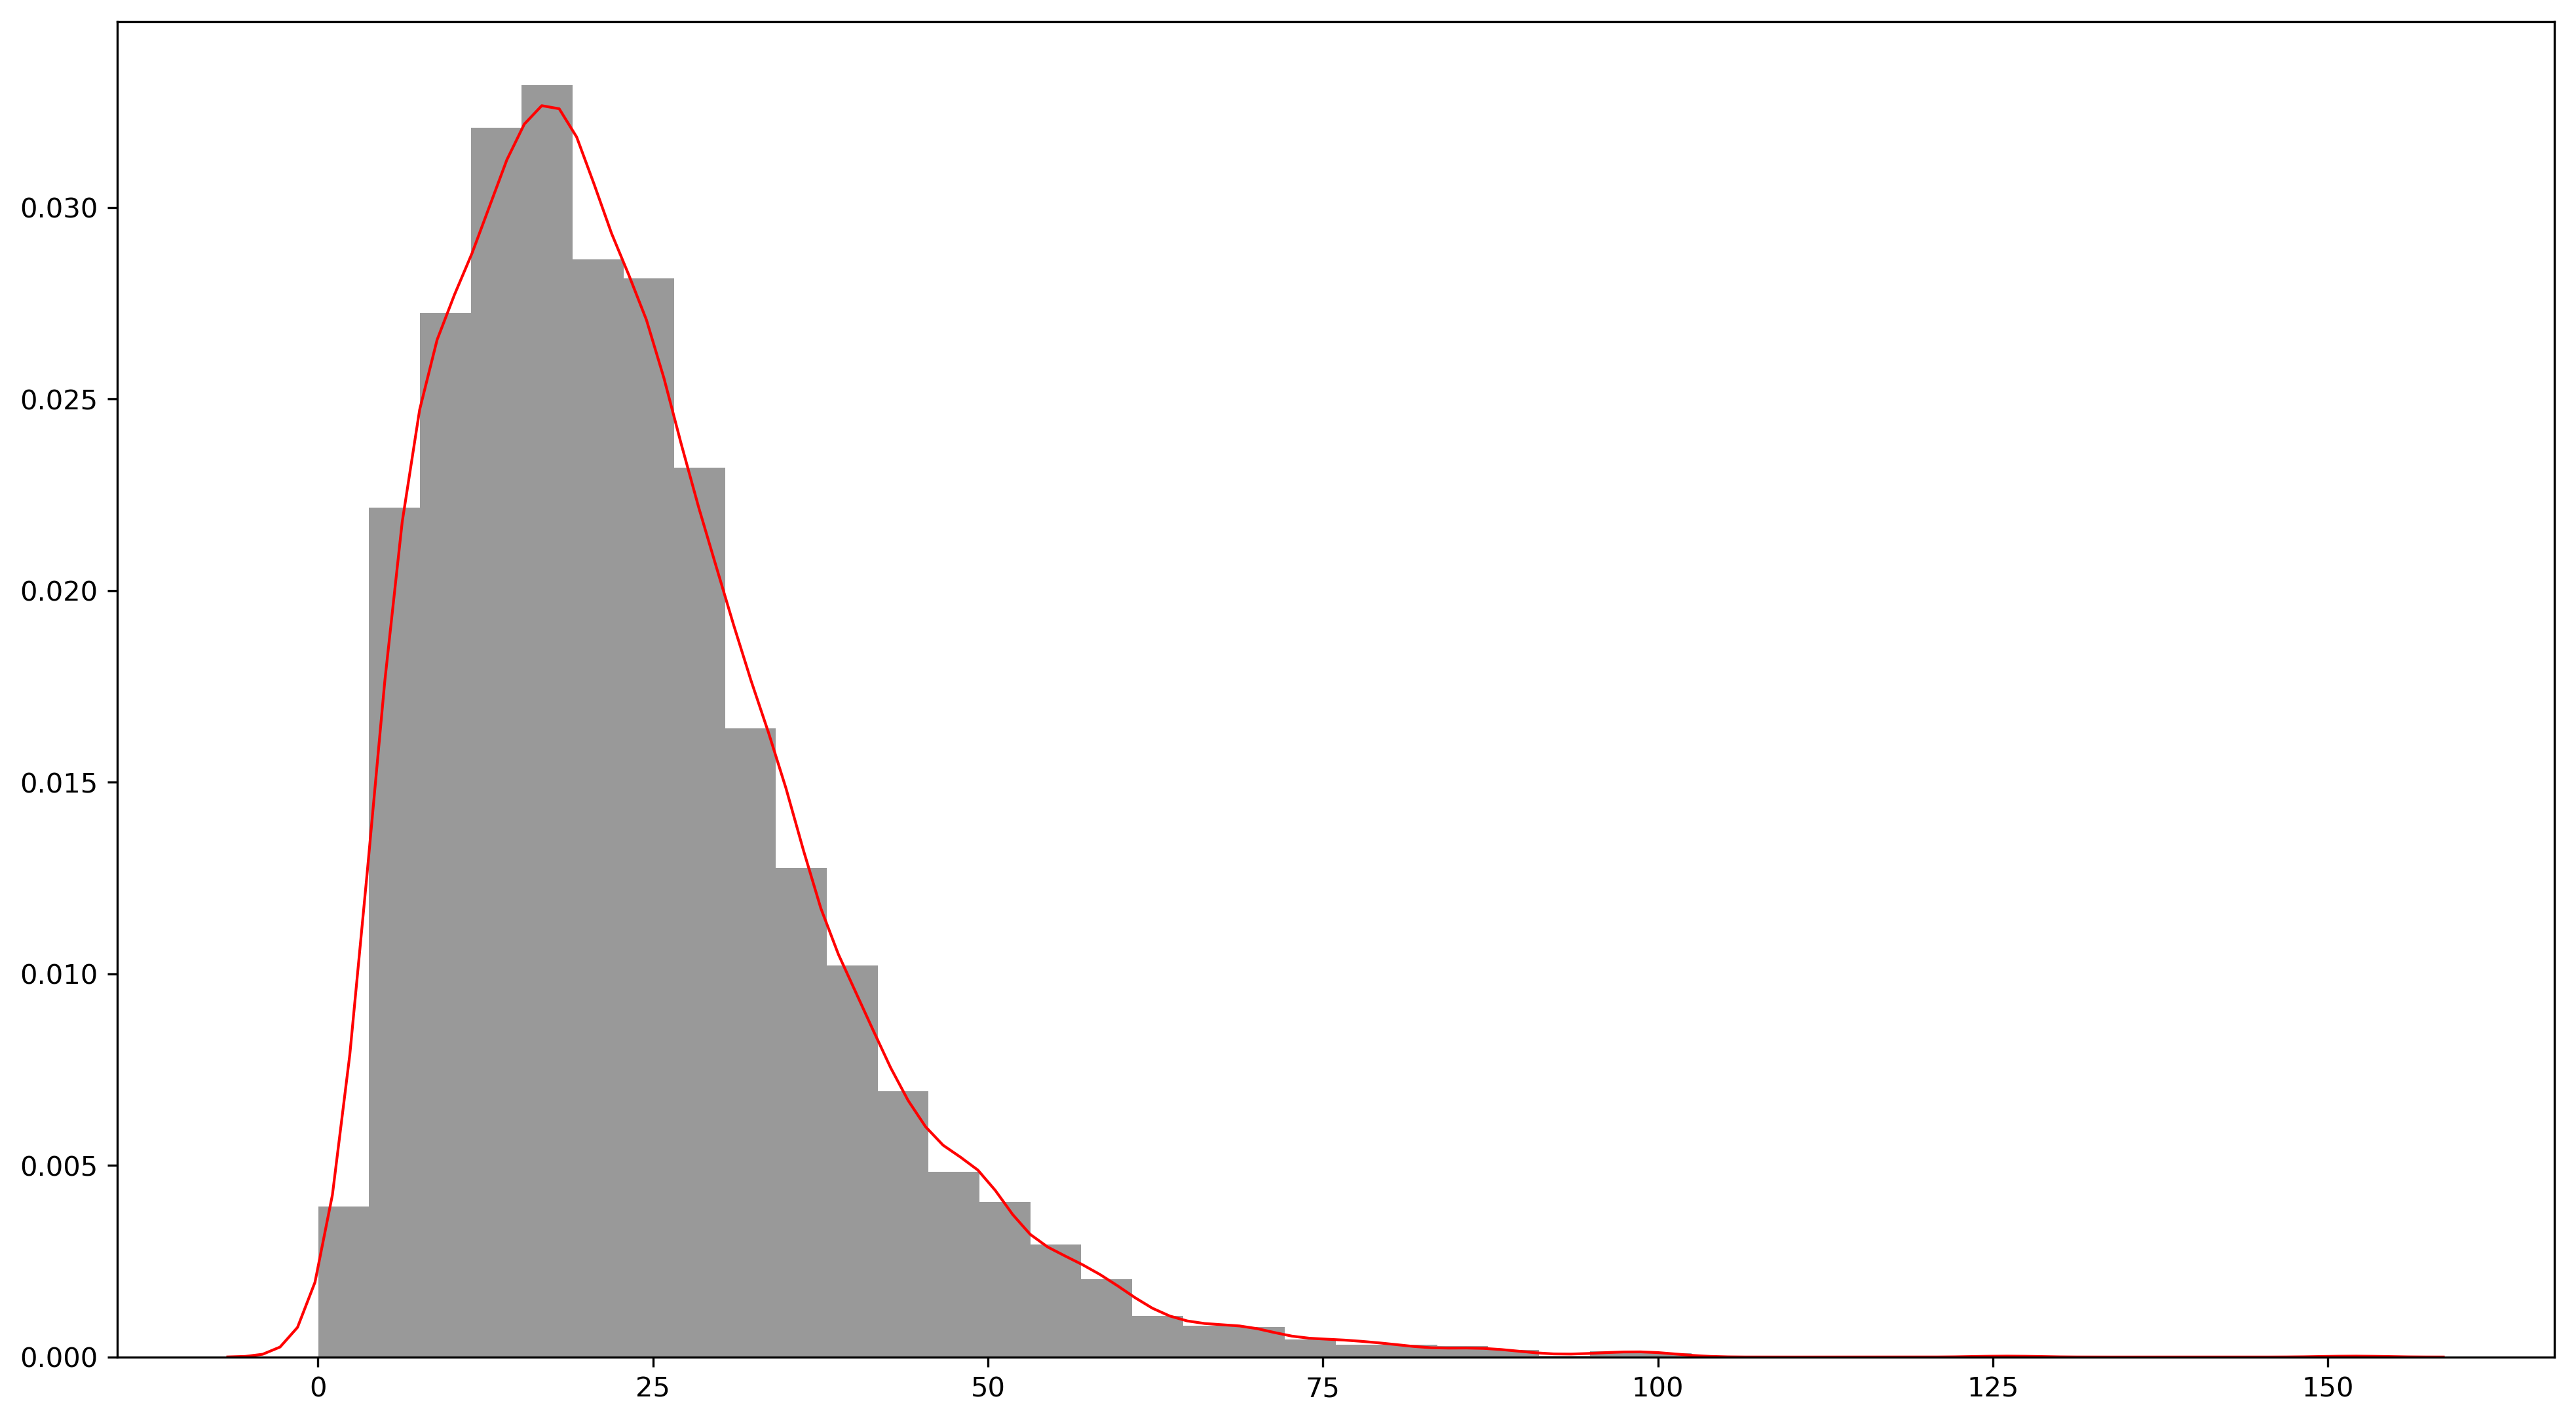

In [195]:
mpl.rc("figure", figsize=(16,9))  
sns.set_palette("hls") 
sns.distplot(meanpriceint,color="r",bins=40, kde_kws={"color":"r", "lw":1 }, hist_kws={ "color": "black" })
plt.savefig('meanprice_hist.png',  bbox_inches = 'tight')
plt.show()

In [196]:
original_data['title'].value_counts()

Pure Bar Organic Chocolate Brownie, Gluten Free, Raw, Vegan,  1.7-Ounce Bars (Pack of 12)    742
illy issimo Coffee Drink, Cappuccino, 8.45-Ounce Cans (Pack of 12)                           741
Peeled Snacks Organic Apple Clusters, Cinnamon Crunch, 60 Gram                               476
Vitamin Squeeze Energy Drink, Fruit Punch, 12-Ounce (Pack of 4)                              468
Starbucks Natural Fusions Ground Coffee, Vanilla Flavored, 11-Ounce Packages (Pack of 2)     445
                                                                                            ... 
Hunts- Snack Pack Pudding, 3.25 oz, 36 Cups Variety Pack                                       5
Arrowhead Mills Organic Adzuki Beans, 1-Pound Unit (Pack of 6)                                 5
Mother Earth Products Dried Sweet Potato Dices, 1 Full Quart                                   5
Green Mountain Coffee, Dark Magic (Extra Bold), 72-Count K-Cups for Keurig Brewers             5
Planters Deluxe Mixed Nuts, 10

In [197]:
# Mean overall of each reviewer
diffreviewerID = list(set(original_data['reviewerID']))
meanstar = []
for reviewerID in diffreviewerID:
    meanstar.append(original_data[original_data['reviewerID']  == reviewerID]['overall'].mean())

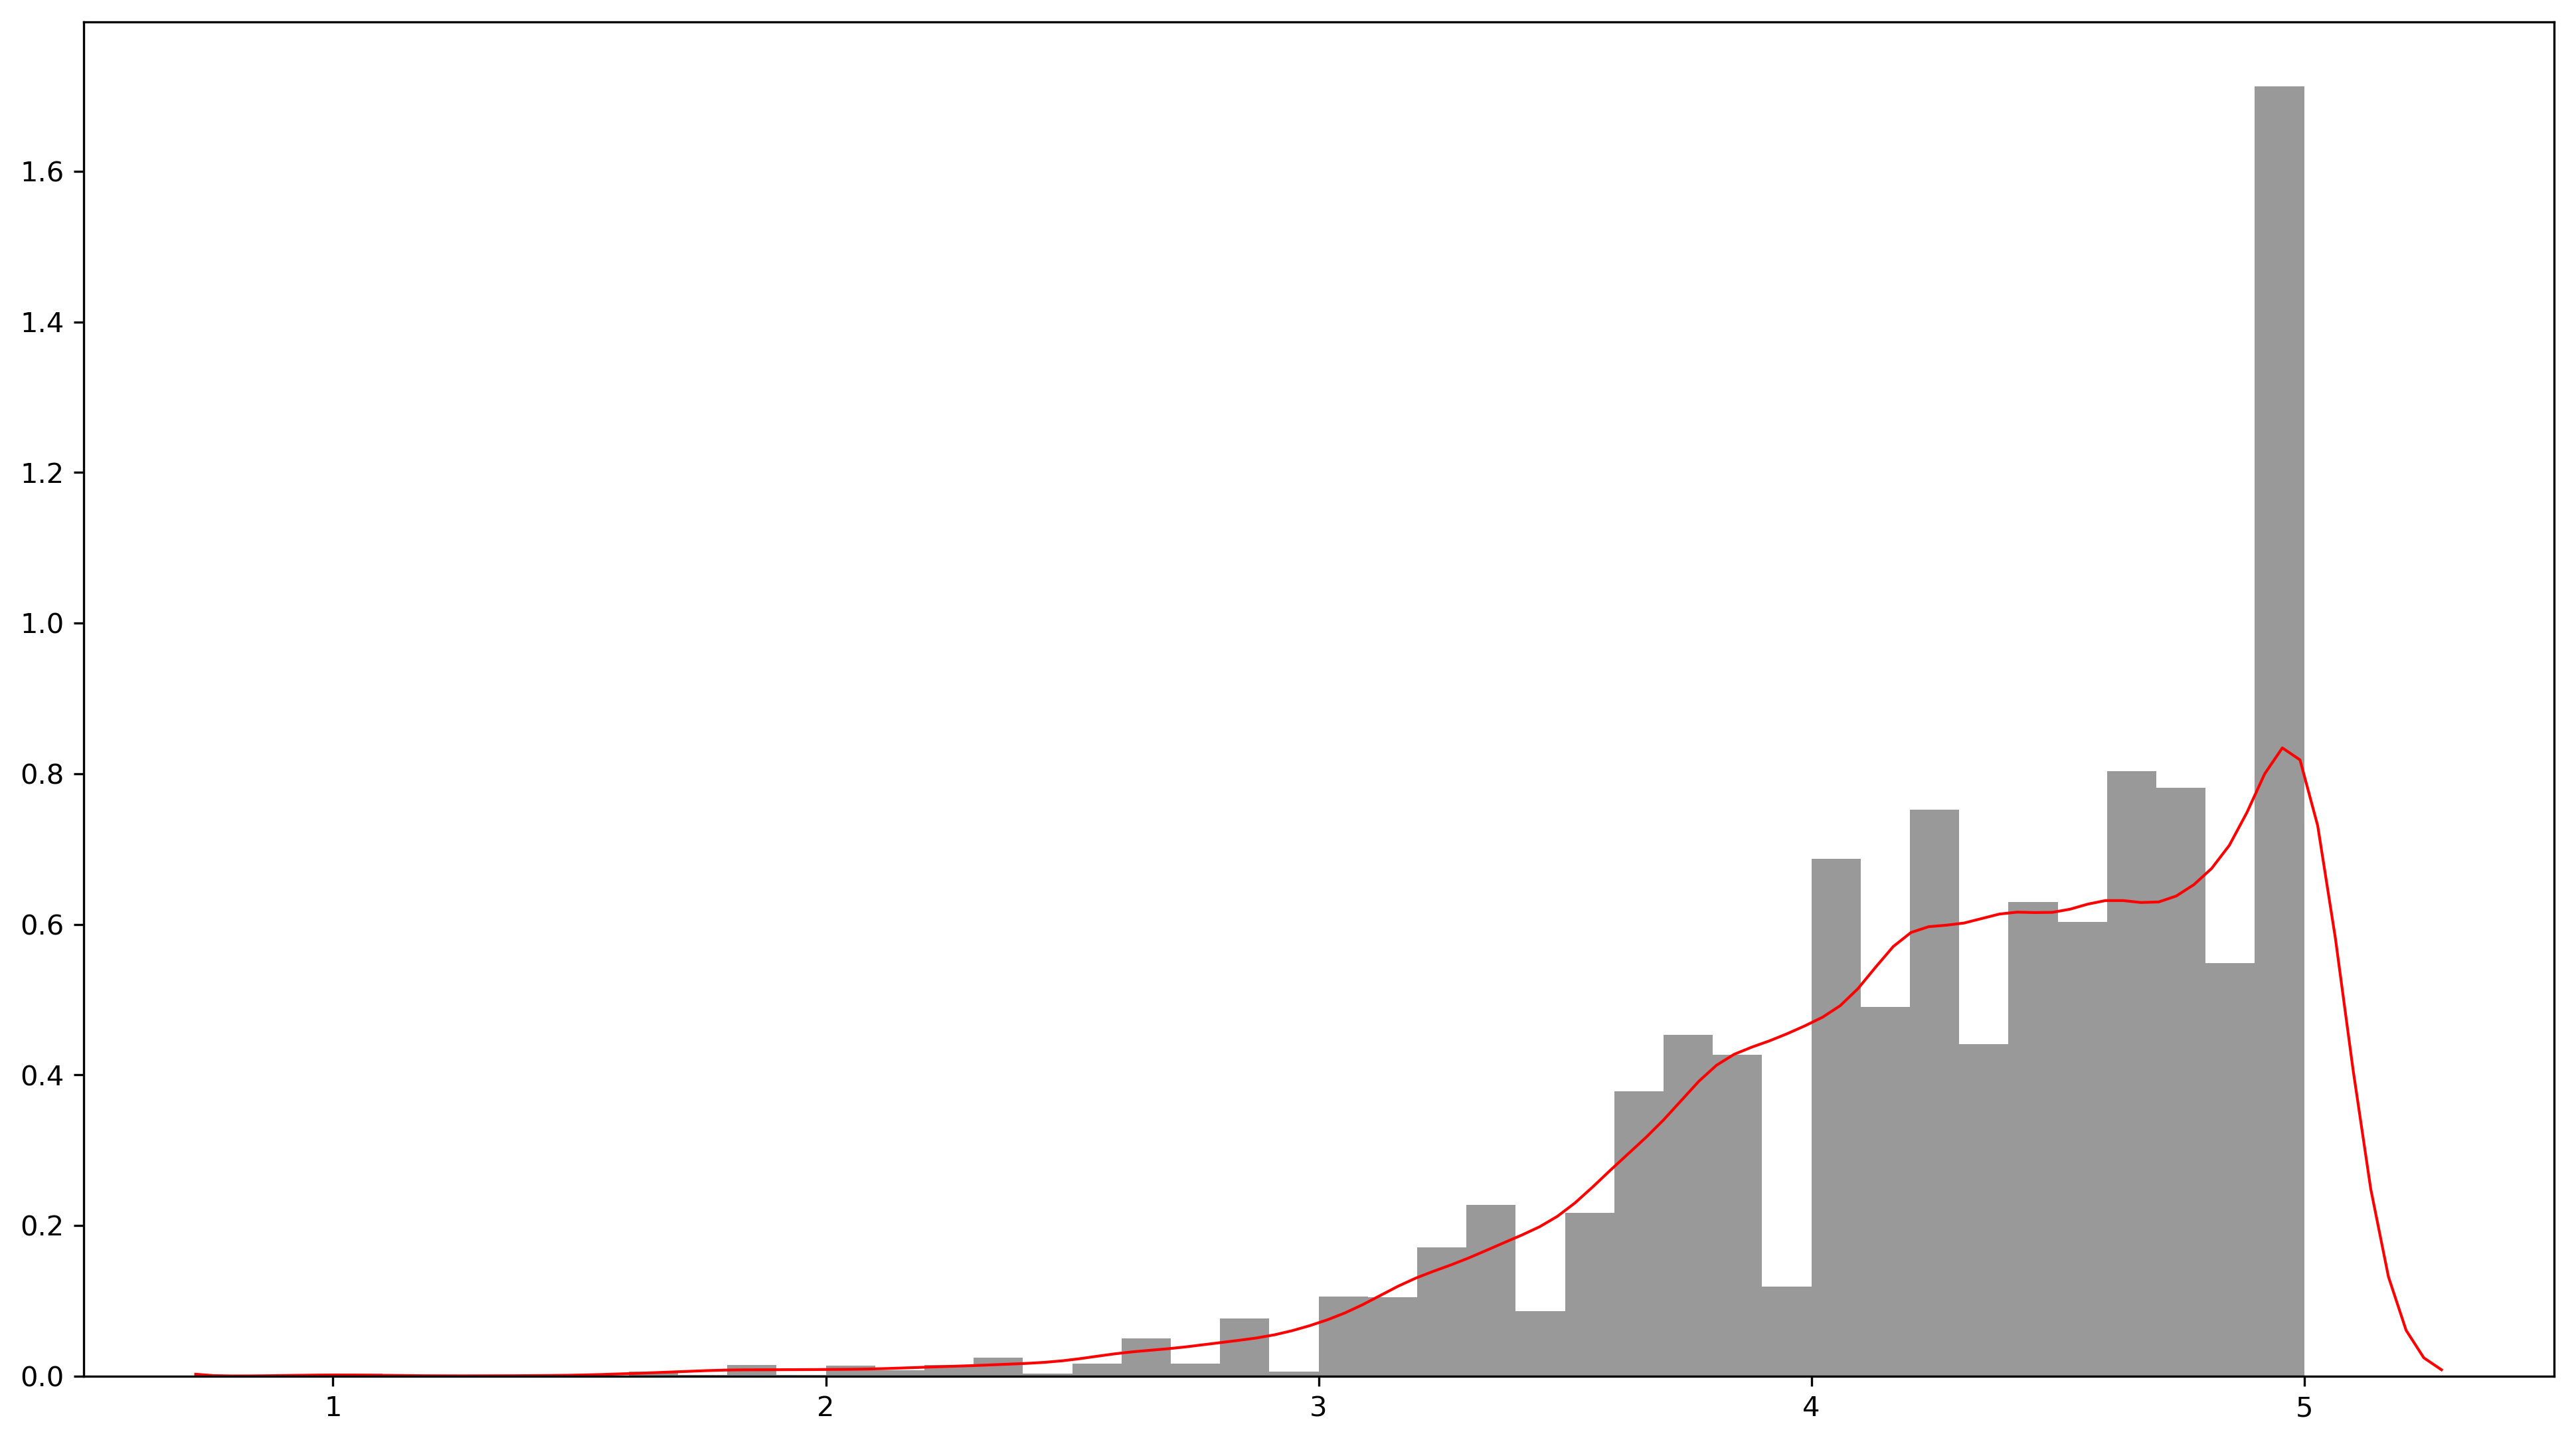

In [198]:
mpl.rc("figure", figsize=(16,9)) 
sns.set_palette("hls") 
sns.distplot(meanstar,color="r",bins=40, kde_kws={"color":"red", "lw":1 }, hist_kws={ "color": "black" })
plt.savefig('meanstar_hist.png', bbox_inches = 'tight')
plt.show()

In [199]:
# Word Cloud
import re

reviewtext= original_data['summary'].tolist()
text_word = []
for word in reviewtext:
    each_review = re.split('[, ]', word)
    for each in each_review:
        text_word.append(each)

In [200]:
# Plot the wordcloud
from wordcloud import WordCloud

f = (' '.join(text_word))
wordcloud = WordCloud(
        background_color="white",
        width=1920,              
        height=1080,             
        margin=10               
        ).generate(f)
plt.imshow(wordcloud)
plt.axis("off")
wordcloud.to_file('review_text.png')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
from collections import Counter
import pylab as pl

# Get the first three words from title and link it with asin
title_list = original_data['title'].tolist()
product_name = []
for title in title_list:
    temp = str(title).split(' ')[0:3]
    key_name = (' '.join(temp))
    product_name.append(key_name)

original_data['product_name'] = product_name

# Look at the top 15 most popular products
mostreview_productname = Counter(original_data['product_name']).most_common(15)
name = []
freq = []
for i in mostreview_productname:
    name.append(i[0])
    freq.append(i[1])

a = plt.bar(name, freq, color=['#a3a1a1','#333030'],alpha=0.8)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2-0.5, 1.01*height, '%s' % int(height))

pl.xticks(rotation=60)
autolabel(a)
plt.ylabel('Frequence', fontsize=12) 
plt.xlabel('Product Names', fontsize=12) 
plt.savefig('reviewfreq.png', bbox_inches = 'tight')

In [ ]:
# Transform helpful to numerical and calculate the ratio
help_list = original_data['helpful'].tolist()
HaveSeen = []
feelnice = []
for i in help_list:
    HaveSeen.append(i[4])# Capture number of viewers   
    feelnice.append(i[1])# Capture number of helpfuls
helpful_rate = []
for i in range(len(HaveSeen)):
    if HaveSeen[i] != '0' and HaveSeen[i] != ' ' and HaveSeen[i] != ',':
        if int(HaveSeen[i]) > 5:
            rate = int(feelnice[i]) / int(HaveSeen[i])
            helpful_rate.append(rate)

print(helpful_rate)

In [ ]:
mpl.rc("figure", figsize=(16,9)) 
plt.xlim((0,1))
sns.set_palette("hls")
sns.distplot(helpful_rate,color="r",bins=50, kde_kws={"color":"red", "lw":1 }, hist_kws={ "color": "black" })
plt.savefig('helpfulrate_hist_5.png')
plt.show()

In [ ]:
# Use the summary to do a sentiment analysis
# First calculate the score of sentiments
from textblob import TextBlob
summary = original_data['summary'].tolist()
score = []
for text in summary:
    blob = TextBlob(text)
    score.append(blob.sentiment.polarity)

In [ ]:
# calculate the mean senitment score of each product
# and then store it in dictionary
original_data['score'] = score
keyname = list(set(original_data['product_name']))
meanscore = dict()
for i in keyname:
    newdf = original_data[original_data['product_name'] == i]
    eachmeanscore = newdf['score'].mean()
    meanscore.update({i :eachmeanscore})

In [ ]:
# Randomly select 30 products in asin and check the score
import random
a = meanscore.keys()
a = list(a)
sample_keyname = random.sample(a, 30)

b = []
for i in sample_keyname:
    b.append(meanscore[i])

In [ ]:
# Plot the scores of the selected product
import pylab as pl

plt.figure(figsize=(16,9))
plt.bar(sample_keyname, b, color=['#a3a1a1','#333030'], alpha = 0.8)
#plt.grid(True)
pl.xticks(rotation=90)
plt.savefig('sample_asin_SentimentScore.png',bbox_inches = 'tight')
plt.show()

## <p style="text-align:center"><span style="color:maroon">Apriori Association Rule Analysis of Amazon Grocery Market Basket</span></p>
---

In [2]:
# Typical Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt

In [3]:
# Specific to apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [4]:
df = pd.read_csv('reviews_merged.csv')

In [5]:
df.shape

(151254, 17)

In [6]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,salesRank,imUrl,categories,title,description,price,related,brand
0,A1VEELTKS8NLZB,616719923X,Amazon Customer,"[0, 0]",Just another flavor of Kit Kat but the taste i...,4.0,Good Taste,1370044800,"06 1, 2013",{'Grocery & Gourmet Food': 37305},http://ecx.images-amazon.com/images/I/51LdEao6...,[['Grocery & Gourmet Food']],Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,Green Tea Flavor Kit Kat have quickly become t...,NaN,"{'also_bought': ['B00FD63L5W', 'B0047YG5UY', '...",NaN
1,A14R9XMZVJ6INB,616719923X,amf0001,"[0, 1]",I bought this on impulse and it comes from Jap...,3.0,"3.5 stars, sadly not as wonderful as I had hoped",1400457600,"05 19, 2014",{'Grocery & Gourmet Food': 37305},http://ecx.images-amazon.com/images/I/51LdEao6...,[['Grocery & Gourmet Food']],Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,Green Tea Flavor Kit Kat have quickly become t...,NaN,"{'also_bought': ['B00FD63L5W', 'B0047YG5UY', '...",NaN
2,A27IQHDZFQFNGG,616719923X,Caitlin,"[3, 4]",Really good. Great gift for any fan of green t...,4.0,Yum!,1381190400,"10 8, 2013",{'Grocery & Gourmet Food': 37305},http://ecx.images-amazon.com/images/I/51LdEao6...,[['Grocery & Gourmet Food']],Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,Green Tea Flavor Kit Kat have quickly become t...,NaN,"{'also_bought': ['B00FD63L5W', 'B0047YG5UY', '...",NaN
3,A31QY5TASILE89,616719923X,DebraDownSth,"[0, 0]","I had never had it before, was curious to see ...",5.0,Unexpected flavor meld,1369008000,"05 20, 2013",{'Grocery & Gourmet Food': 37305},http://ecx.images-amazon.com/images/I/51LdEao6...,[['Grocery & Gourmet Food']],Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,Green Tea Flavor Kit Kat have quickly become t...,NaN,"{'also_bought': ['B00FD63L5W', 'B0047YG5UY', '...",NaN
4,A2LWK003FFMCI5,616719923X,Diana X.,"[1, 2]",I've been looking forward to trying these afte...,4.0,"Not a very strong tea flavor, but still yummy ...",1369526400,"05 26, 2013",{'Grocery & Gourmet Food': 37305},http://ecx.images-amazon.com/images/I/51LdEao6...,[['Grocery & Gourmet Food']],Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,Green Tea Flavor Kit Kat have quickly become t...,NaN,"{'also_bought': ['B00FD63L5W', 'B0047YG5UY', '...",NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151254 entries, 0 to 151253
Data columns (total 17 columns):
reviewerID        151254 non-null object
asin              151254 non-null object
reviewerName      149761 non-null object
helpful           151254 non-null object
reviewText        151232 non-null object
overall           151254 non-null float64
summary           151254 non-null object
unixReviewTime    151254 non-null int64
reviewTime        151254 non-null object
salesRank         144292 non-null object
imUrl             151065 non-null object
categories        151254 non-null object
title             151065 non-null object
description       120736 non-null object
price             126734 non-null float64
related           145832 non-null object
brand             104155 non-null object
dtypes: float64(2), int64(1), object(14)
memory usage: 19.6+ MB


In [8]:
df.isna().sum()

reviewerID            0
asin                  0
reviewerName       1493
helpful               0
reviewText           22
overall               0
summary               0
unixReviewTime        0
reviewTime            0
salesRank          6962
imUrl               189
categories            0
title               189
description       30518
price             24520
related            5422
brand             47099
dtype: int64

Fortunately, no there are no *NA* values in either `reviewerID` or `asin` columns.

---

### <span style='color:red'>*Assumption*</span>

There are no invoice numbers so treat each member (aka `reviewerID`) as an invoice and "also bought" will be treated the same as "bought together" in the context of invoices.

***Test*** *the process:*

In [9]:
user01 = df.at[0, 'reviewerID']; user01

'A1VEELTKS8NLZB'

In [10]:
invoice01 = df[['reviewerID', 'asin', 'title']].loc[df['reviewerID']==user01, :]; invoice01

,reviewerID,asin,title
0,A1VEELTKS8NLZB,616719923X,Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...
4753,A1VEELTKS8NLZB,B0009K77O8,Yamamotoyama - Genmai Cha (Brown Rice Tea) 90 ...
16342,A1VEELTKS8NLZB,B000F4DKC6,"Twinings Herbal Tea, Lemon &amp; Chinese Ginge..."
31520,A1VEELTKS8NLZB,B000R71WMQ,Raw Organic Apple Cider Vinegar by Bragg (1 ga...
76195,A1VEELTKS8NLZB,B002VT3GXG,"Nongshim Hoo Roo Rook, 3.24 Ounce Bags (Pack o..."
95550,A1VEELTKS8NLZB,B004BJYPCK,Myojo Chukazanmai Instant Ramen Miso Soybean P...
115384,A1VEELTKS8NLZB,B005HUVJYO,"Miyasaka Instant Authentic Soup, Miso, 0.27-Ou..."


In [11]:
invoice_pv = (invoice01.groupby(['reviewerID', 'title'])['asin']
              .count().unstack().reset_index().set_index('reviewerID'))
invoice_pv

title,Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5),"Miyasaka Instant Authentic Soup, Miso, 0.27-Ounce (Pack of 12)","Myojo Chukazanmai Instant Ramen Miso Soybean Paste Flavor, 3.84-Ounce (Pack of 6)","Nongshim Hoo Roo Rook, 3.24 Ounce Bags (Pack of 24)",Raw Organic Apple Cider Vinegar by Bragg (1 gallon),"Twinings Herbal Tea, Lemon &amp; Chinese Ginger, 20 Teabag Box (Pack of 6)",Yamamotoyama - Genmai Cha (Brown Rice Tea) 90 Bag Value Pack
reviewerID,,,,,,,
A1VEELTKS8NLZB,1,1,1,1,1,1,1


In [12]:
df_2 = df[['reviewerID', 'asin', 'title']].copy(deep=True)
basket = (df_2.groupby(['reviewerID', 'title'])['asin'].count().unstack()
          .reset_index().fillna(0).set_index('reviewerID'))

In [13]:
basket.head(8)

title,&quot;Raspberry Leaf C/S Organic 1 pound,1 Gallon 100% Organic Extra Virgin Raw Coconut Oil,1 Gallon Snappy Butter Burst Oil,100 Blooms of Peruvian Lilies,"100 Calorie Packs Lorna Doone Shortbread Cookie Crisps, 6-Count Boxes (Pack of 6)","100 Calorie Packs Oreo Thin Crisps, 6-Count Packs (Pack of 2)","100 Calorie Packs Planters Peanut Butter Cookie Crisps, 6-Count Packs (Pack of 6)",100 Pcs Fortune Cookies Fresh Single Wrap(golden Bowl),100% Bovine GELATIN 14oz.,100% Coconut Milk - 33.8 oz packages (1-pack),...,"mix 1 Protein &amp; Antioxidant Drink, Mix Berry, 11-Ounce Bottles (Pack of 12)","reGen Chocolate Muscle Recovery Beverage, 11-Ounce Containers (Pack of 24)","saf-instant Gold Instant Yeast, 1 Pound Package","thinkOrganic Bar, Chocolate Coconut, 1.4-Ounce Bars (Pack of 15)","thinkThin BITES 100 Calorie Cookies &amp; Cream, Gluten Free, 5-Count (0.88-Ounce) Bars (Pack of 6)","thinkThin Chocolate Covered Strawberries, Gluten Free, 1.76-Ounce Bar (Pack of 10)","thinkThin Chocolate Espresso, Gluten Free, 2.1-Ounce Bars (Pack of 10)","thinkThin Chocolate Fudge, Gluten Free, 2.1-Ounce Bars (Pack of 10)","thinkThin Tangerine Cremesicle, Gluten Free, 1.76-Ounce Bars","truRoots Organic Quinoa 100% Whole Grain Premium Quality, 4 lbs"
reviewerID,,,,,,,,,,,,,,,,,,,,,
A00177463W0XWB16A9O05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A022899328A0QROR32DCT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A04309042SDSL8YX2HRR7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A068255029AHTHDXZURNU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A06944662TFWOKKV4GJKX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1004703RC79J9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1006HCQDMYC5W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1008DPSP6KC9J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Check first that the information is correct using our single test case from above.

In [15]:
basket.loc[user01, :].head()

title
&quot;Raspberry Leaf C/S Organic 1 pound                                             0.0
1 Gallon 100% Organic Extra Virgin Raw Coconut Oil                                   0.0
1 Gallon Snappy Butter Burst Oil                                                     0.0
100 Blooms of Peruvian Lilies                                                        0.0
100 Calorie Packs Lorna Doone Shortbread Cookie Crisps, 6-Count Boxes (Pack of 6)    0.0
Name: A1VEELTKS8NLZB, dtype: float64

In [18]:
basket.loc[user01, ['Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5)']]

title
Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5)    1.0
Name: A1VEELTKS8NLZB, dtype: float64

In [19]:
basket.loc[user01, :].sum()  # Should have 7 items

7.0

The goal is to see what items were "also bought" by members, so make sure any count values > 1.0 are set to 1.0 for purposes of this model.

In [20]:
vals = np.unique(basket.values)
print('max items:', basket.values.max(), 'min items:', basket.values.min())
print('values in array:', list(vals))

max items: 2.0 min items: 0.0
values in array: [0.0, 1.0, 2.0]


In [21]:
basket_sets = basket.applymap(lambda x: 1.0 if x > 1 else x)

In [22]:
np.unique(basket_sets.values)

array([0., 1.])

Save out a .csv of `basket` that is now pre-formatted and can be loaded in to save pre-processing time in further analyses.

In [25]:
basket_sets.to_csv('reviews_merged_apriori_preprocessed1hot.csv', index=False)

---

#### Create Frequent Itemsets and Generate Rules
Start with a very low support threshold for an initial check because the data is very sparse. We can build up from there.

In [26]:
frequent_itemsets = apriori(basket_sets, min_support=0.005, use_colnames=True)

In [27]:
pd.set_option('max_colwidth', 150)
frequent_itemsets.sort_values('support', ascending=False).head(15)  # 582 in total for min_support=0.005

,support,itemsets
254,0.050542,"(Pure Bar Organic Chocolate Brownie, Gluten Free, Raw, Vegan, 1.7-Ounce Bars (Pack of 12))"
333,0.050473,"(illy issimo Coffee Drink, Cappuccino, 8.45-Ounce Cans (Pack of 12))"
241,0.032423,"(Peeled Snacks Organic Apple Clusters, Cinnamon Crunch, 60 Gram)"
317,0.031878,"(Vitamin Squeeze Energy Drink, Fruit Punch, 12-Ounce (Pack of 4))"
294,0.030311,"(Starbucks Natural Fusions Ground Coffee, Vanilla Flavored, 11-Ounce Packages (Pack of 2))"
95,0.029834,"(Gold Kili All Natural Instant Ginger &amp; Lemon Beverage Mix, 6.72-Ounce Boxes (Pack of 6))"
156,0.029153,"(Kraft Velveeta Ultimate Cheesburger Skillets Dinner Kit, 12.86-Ounce (Pack of 6))"
163,0.029017,"(Lipton Herbal Pyramid Tea Bags, Blackberry Vanilla, 18Count (Pack of 6))"
214,0.028540,"(Numi Organic Tea Chocolate Puerh, Full Leaf Black Tea, 1.24 oz.,16 Count Tea Bags)"
319,0.027382,"(Werther's Original Caramel Milk Chocolate, 5.2-Ounce Bags (Pack of 6))"


**We are much more interested in confidence and lift for these items.**

In [28]:
conf_and_lift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
conf_and_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Baby Gourmet Organic Simple Purees Stage 1 (6 Months+) Orchard, Apple, Carrot and Prune Baby Food, 4.5-Ounce Pouches (Pack of 12))","(ALOE GLOE Natural Aloe Water, White Grape Pulp Free, 15.2-Ounce (Pack of 12))",0.024794,0.015258,0.005926,0.239011,15.664823,0.005548,1.294029
1,"(ALOE GLOE Natural Aloe Water, White Grape Pulp Free, 15.2-Ounce (Pack of 12))","(Baby Gourmet Organic Simple Purees Stage 1 (6 Months+) Orchard, Apple, Carrot and Prune Baby Food, 4.5-Ounce Pouches (Pack of 12))",0.015258,0.024794,0.005926,0.388393,15.664823,0.005548,1.594497
2,"(Essentia 9.5 pH Drinking Water, 20-Ounce (Pack of 24))","(ALOE GLOE Natural Aloe Water, White Grape Pulp Free, 15.2-Ounce (Pack of 12))",0.026429,0.015258,0.009059,0.342784,22.466092,0.008656,1.498353
3,"(ALOE GLOE Natural Aloe Water, White Grape Pulp Free, 15.2-Ounce (Pack of 12))","(Essentia 9.5 pH Drinking Water, 20-Ounce (Pack of 24))",0.015258,0.026429,0.009059,0.593750,22.466092,0.008656,2.396483
4,"(Gold Kili All Natural Instant Ginger &amp; Lemon Beverage Mix, 6.72-Ounce Boxes (Pack of 6))","(ALOE GLOE Natural Aloe Water, White Grape Pulp Free, 15.2-Ounce (Pack of 12))",0.029834,0.015258,0.006403,0.214612,14.065700,0.005948,1.253829
5,"(ALOE GLOE Natural Aloe Water, White Grape Pulp Free, 15.2-Ounce (Pack of 12))","(Gold Kili All Natural Instant Ginger &amp; Lemon Beverage Mix, 6.72-Ounce Boxes (Pack of 6))",0.015258,0.029834,0.006403,0.419643,14.065700,0.005948,1.671670
6,"(Lipton Herbal Pyramid Tea Bags, Blackberry Vanilla, 18Count (Pack of 6))","(ALOE GLOE Natural Aloe Water, White Grape Pulp Free, 15.2-Ounce (Pack of 12))",0.029017,0.015258,0.005585,0.192488,12.615715,0.005143,1.219477
7,"(ALOE GLOE Natural Aloe Water, White Grape Pulp Free, 15.2-Ounce (Pack of 12))","(Lipton Herbal Pyramid Tea Bags, Blackberry Vanilla, 18Count (Pack of 6))",0.015258,0.029017,0.005585,0.366071,12.615715,0.005143,1.531691
8,"(ALOE GLOE Natural Aloe Water, White Grape Pulp Free, 15.2-Ounce (Pack of 12))","(Numi Organic Savory Tea Garden Sampler Pack, 12 Count (Total Net Wt. 1.83 oz))",0.015258,0.019617,0.005449,0.357143,18.205605,0.005150,1.525040
9,"(Numi Organic Savory Tea Garden Sampler Pack, 12 Count (Total Net Wt. 1.83 oz))","(ALOE GLOE Natural Aloe Water, White Grape Pulp Free, 15.2-Ounce (Pack of 12))",0.019617,0.015258,0.005449,0.277778,18.205605,0.005150,1.363489


In [30]:
avg_conf = conf_and_lift['confidence'].mean()
avg_lift = conf_and_lift['lift'].mean()
print('Average confidence is {:.3f} and average lift is {:.3f} for lift >= 1.0'.format(avg_conf, avg_lift))

Average confidence is 0.365 and average lift is 17.559 for lift >= 1.0


We want to take a closer look at the items where *confidence* is high that they are purchased together and where the *lift* is well above average. We get this information by dissecting the output dataframe.

In [31]:
hi_ConLft = conf_and_lift[(conf_and_lift['lift'] >= 20) & (conf_and_lift['confidence'] >= 0.75)]
hi_ConLft.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
719,"(ALOE GLOE Natural Aloe Water, White Grape Pulp Free, 15.2-Ounce (Pack of 12), Peeled Snacks Organic Apple Clusters, Cinnamon Crunch, 60 Gram, ill...","(Essentia 9.5 pH Drinking Water, 20-Ounce (Pack of 24))",0.006743,0.026429,0.005722,0.848485,32.104655,0.005543,6.425570
376,"(Numi Organic Tea Chocolate Puerh, Full Leaf Black Tea, 1.24 oz.,16 Count Tea Bags, ALOE GLOE Natural Aloe Water, White Grape Pulp Free, 15.2-Ounc...","(Peeled Snacks Organic Apple Clusters, Cinnamon Crunch, 60 Gram)",0.006130,0.032423,0.005041,0.822222,25.359337,0.004842,5.442621
733,"(ALOE GLOE Natural Aloe Water, White Grape Pulp Free, 15.2-Ounce (Pack of 12), Vitamin Squeeze Energy Drink, Fruit Punch, 12-Ounce (Pack of 4), il...","(Essentia 9.5 pH Drinking Water, 20-Ounce (Pack of 24))",0.006198,0.026429,0.005041,0.813187,30.769061,0.004877,5.211470
817,"(Peeled Snacks Organic Apple Clusters, Cinnamon Crunch, 60 Gram, illy issimo Coffee Drink, Cappuccino, 8.45-Ounce Cans (Pack of 12), avitae 90 Mg ...","(Essentia 9.5 pH Drinking Water, 20-Ounce (Pack of 24))",0.006403,0.026429,0.005177,0.808511,30.592125,0.005008,5.084206
340,"(Gold Kili All Natural Instant Ginger &amp; Lemon Beverage Mix, 6.72-Ounce Boxes (Pack of 6), ALOE GLOE Natural Aloe Water, White Grape Pulp Free,...","(Essentia 9.5 pH Drinking Water, 20-Ounce (Pack of 24))",0.006403,0.026429,0.005177,0.808511,30.592125,0.005008,5.084206
363,"(Gold Kili All Natural Instant Ginger &amp; Lemon Beverage Mix, 6.72-Ounce Boxes (Pack of 6), ALOE GLOE Natural Aloe Water, White Grape Pulp Free,...","(Peeled Snacks Organic Apple Clusters, Cinnamon Crunch, 60 Gram)",0.006403,0.032423,0.005177,0.808511,24.936438,0.004969,5.052903
718,"(ALOE GLOE Natural Aloe Water, White Grape Pulp Free, 15.2-Ounce (Pack of 12), Essentia 9.5 pH Drinking Water, 20-Ounce (Pack of 24), illy issimo ...","(Peeled Snacks Organic Apple Clusters, Cinnamon Crunch, 60 Gram)",0.007084,0.032423,0.005722,0.807692,24.911199,0.005492,5.031401
465,"(Essentia 9.5 pH Drinking Water, 20-Ounce (Pack of 24), Numi Organic Savory Tea Garden Sampler Pack, 12 Count (Total Net Wt. 1.83 oz))","(Peeled Snacks Organic Apple Clusters, Cinnamon Crunch, 60 Gram)",0.007152,0.032423,0.005722,0.800000,24.673950,0.005490,4.837886
788,"(Essentia 9.5 pH Drinking Water, 20-Ounce (Pack of 24), Numi Organic Tea Chocolate Puerh, Full Leaf Black Tea, 1.24 oz.,16 Count Tea Bags, illy is...","(Peeled Snacks Organic Apple Clusters, Cinnamon Crunch, 60 Gram)",0.006471,0.032423,0.005177,0.800000,24.673950,0.004967,4.837886
352,"(Vitamin Squeeze Energy Drink, Fruit Punch, 12-Ounce (Pack of 4), ALOE GLOE Natural Aloe Water, White Grape Pulp Free, 15.2-Ounce (Pack of 12))","(Essentia 9.5 pH Drinking Water, 20-Ounce (Pack of 24))",0.007356,0.026429,0.005790,0.787037,29.779615,0.005595,4.571552


In [32]:
hi_ConLft['antecedents'].count()

18

There are **18** itemsets (i.e. mix of products) that meet these criteria. The top "basket" has the following combinations:

In [33]:
top_basket_items = [list(x) for x in [hi_ConLft.iloc[0,0], hi_ConLft.iloc[0,1]]]
print(top_basket_items

[['Gold Kili All Natural Instant Ginger &amp; Lemon Beverage Mix, 6.72-Ounce Boxes (Pack of 6)', 'ALOE GLOE Natural Aloe Water, White Grape Pulp Free, 15.2-Ounce (Pack of 12)'], ['Essentia 9.5 pH Drinking Water, 20-Ounce (Pack of 24)']]


# Collaborative Filtering

In [229]:
pivot = df.pivot(index='reviewerID', columns='asin', values='overall')
pivot

asin,616719923X,9742356831,B00004S1C5,B0000531B7,B00005344V,B0000537AF,B00005C2M2,B00006IUTN,B0000CCZYY,B0000CD06J,...,B00IVT3LLW,B00IWBMCMS,B00J9IUCHA,B00JAXNMRG,B00JEL3N1E,B00JGPG60I,B00JL6LTMW,B00K00H9I6,B00KC0LGI8,B00KCJRVO2
reviewerID,,,,,,,,,,,,,,,,,,,,,
A00177463W0XWB16A9O05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A022899328A0QROR32DCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A04309042SDSL8YX2HRR7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A068255029AHTHDXZURNU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A06944662TFWOKKV4GJKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1004703RC79J9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1006HCQDMYC5W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1008DPSP6KC9J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A100DXY4SLAMPM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [230]:
data = pivot.applymap(lambda x: 1 if x > 3 else 0).as_matrix()
data

/Users/marcushimelhoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [231]:
data.shape

(14681, 8713)

In [232]:
# Define the Cosine Similarity function
def cosine_similarity(u, v):
    return(np.dot(u, v)/np.sqrt((np.dot(u, u) * np.dot(v, v))))

In [233]:
# making a fake user
x=data
y = np.zeros(data.shape[1], dtype=np.int32)
y[6] = 1 ; y[10] = 1; y[15] = 1; y[64] = 1; y[136] = 1
y[180] = 1; y[230] = 1; y[339] = 1; y[622] = 1; y[1400] = 1

# Add a special index column to map the row in the x matrix to the userIds
pivot.tmp_idx = np.array(range(x.shape[0]))

/Users/marcushimelhoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [234]:
# Compute similarity, find maximum value
sims = np.apply_along_axis(cosine_similarity, 1, x, y)
mx = np.nanmax(sims)

# Find the best matching user
usr_idx = np.where(sims==mx)[0][0]

# 15 reviews of test user and matched user.
print(y[:15])
print(x[usr_idx, :15])

print('\nCosine Similarity(y, x[{0:d}]) = {1:4.3f}' \
      .format(usr_idx, cosine_similarity(y, x[usr_idx])), end='\n\n')

# Now we subtract the vectors
# (any negative value is a product to recommend)
prod_vec = y - x[usr_idx]
#print(mov_vec[40:600])

# We want a mask aray, so we zero out any recommended product.
prod_vec[prod_vec >= 0] = 1
prod_vec[prod_vec < 0] = 0
print(prod_vec[40:60])

/Users/marcushimelhoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


[0 0 0 0 0 0 1 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Cosine Similarity(y, x[2657]) = 0.158

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [235]:
mx

0.15811388300841897

In [236]:
prod_vec.shape

(8713,)

In [237]:
# Print out the number of products we will recommend.
print('\n{0} Product Recommendations for User = {1}' \
      .format(prod_vec[prod_vec == 0].shape[0], 
              pivot[pivot.tmp_idx == usr_idx].index[0]))


3 Product Recommendations for User = A1PBO90FMY86D6


In [238]:
# Get the columns (productIDs) for the current user
prod_ids =  pivot[pivot.tmp_idx == usr_idx].columns

In [239]:
# Now make a masked array to find products to recommend
# values are the products ids, mask is the products the most
# similar user liked.
ma_prod_idx = ma.array(prod_ids, mask = prod_vec)
prod_idx = ma_prod_idx[~ma_prod_idx.mask]

In [240]:
# Now make a DataFrame of the products of interest and display
products = df.ix[df.asin.isin(prod_idx)].dropna()
a=products.asin.values[:]
np.unique(a)

/Users/marcushimelhoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


array(['B000E46GFK', 'B000LKU3WY', 'B003VIJI1A'], dtype=object)

### Multiple Recommendations

In [241]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
x, y = data, range(data.shape[0])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=42)

pivot.tmp_idx = np.array(y) #array of numbers 0 to 14681

In [242]:
x_train[train_idx]  

NameError: name 'train_idx' is not defined

In [ ]:
#Iterate through each user in test set.
for idx, user in enumerate(x_test):
    
    # Compute similarity, find maximum value
    sims = np.apply_along_axis(cosine_similarity, 1, x_train, user)
    mx = np.nanmax(sims)
    
    # If maximum value is a real value    
    if mx > 0:
        
        # Find the index in the similarity matrix with maximum value
        train_idx = np.where(sims==mx)[0][0]
        
        # Now we subtract the vectors 
        # (any negative value is a movie to recommend)
        prod_vec = user - x_train[train_idx]     
        
        # We make a mask aray, so we zero out any recommended movie.
        prod_vec[prod_vec >= 0] = 1
        prod_vec[prod_vec < 0] = 0

        user_idx = pivot[pivot.tmp_idx == y_train[train_idx]]

        print('\n{0} Product Recommendations for User = {1}' \
      .format(prod_vec[prod_vec == 0].shape[0], 
              pivot[pivot.tmp_idx == usr_idx].index[0]))
        
        print(60*'-')
        
        prod_ids =  pivot[pivot.tmp_idx == usr_idx].columns
        # Now make a masked array to find movies to recommend
        # values are the movie ids, mask is the movies the most
        # similar user liked.
        ma_prod_idx = ma.array(prod_ids, mask = prod_vec)
        prod_idx = ma_prod_idx[~ma_prod_idx.mask]


        # Now make a DataFrame of the moves of interest and display
        products = df.ix[df.asin.isin(prod_idx)].dropna()
        list1=[]
        for p in products.asin.values:
            list1.append(p)
            x=np.array(list1)
        print(np.unique(x))    

        print(60*'-', end='\n\n')

# Simple Popularity, Item-Item Collaborative Filtering  and Matrix Factorization models using Turicreate

TuriCreate was developed by Apple and uses it's own type of dataframe called SFrame.  The package has it's own visualization capabilities which are briefly tried below.

The code below shows methodology testing a simple popularity model and two more advanced recommendation methods using cosine similarity and matrix factorization within TuriCreate.

In the simiple popularity model, we simply find the most popular items (those most often rated 5.0) and recommend these items to users.  I think this method may be useful in a true cold start scenario, but not useful in more in depth situations.

More advanced methods are shown by finding the cosine similarity of items and recommending to a user a 'similar' item to an item which they've previously purchased.  This method only produced a RMSE of 4.301, which can be improved. 

The final method we tried was a matrix factorization approach in which both similar items and similar users are found based on rating histories. This model was able to produce stronger recommendations and resulted in a 1.27 RMSE



importing and cleaning data

In [201]:
#import ratings data
import gzip
path = '/Users/marcushimelhoch/Downloads/'

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('reviews_Grocery_and_Gourmet_Food_5.json.gz')

In [202]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1VEELTKS8NLZB,616719923X,Amazon Customer,"[0, 0]",Just another flavor of Kit Kat but the taste i...,4.0,Good Taste,1370044800,"06 1, 2013"
1,A14R9XMZVJ6INB,616719923X,amf0001,"[0, 1]",I bought this on impulse and it comes from Jap...,3.0,"3.5 stars, sadly not as wonderful as I had hoped",1400457600,"05 19, 2014"
2,A27IQHDZFQFNGG,616719923X,Caitlin,"[3, 4]",Really good. Great gift for any fan of green t...,4.0,Yum!,1381190400,"10 8, 2013"
3,A31QY5TASILE89,616719923X,DebraDownSth,"[0, 0]","I had never had it before, was curious to see ...",5.0,Unexpected flavor meld,1369008000,"05 20, 2013"
4,A2LWK003FFMCI5,616719923X,Diana X.,"[1, 2]",I've been looking forward to trying these afte...,4.0,"Not a very strong tea flavor, but still yummy ...",1369526400,"05 26, 2013"


In [203]:
df= df.drop(columns = [ 'reviewerName','helpful', 'unixReviewTime', 'reviewTime'])

In [204]:
df = df.drop(columns = ['reviewText','summary'])

In [205]:
df.head()

,reviewerID,asin,overall
0,A1VEELTKS8NLZB,616719923X,4.0
1,A14R9XMZVJ6INB,616719923X,3.0
2,A27IQHDZFQFNGG,616719923X,4.0
3,A31QY5TASILE89,616719923X,5.0
4,A2LWK003FFMCI5,616719923X,4.0


In [207]:
import numpy as np

8713

In [212]:
import turicreate
tu_data = turicreate.SFrame(df)

In [213]:
tu_data['overall'].show()

Materializing SArray

1. Create a simple popularity model: all users have the same recommendation based on the most popular choices

In [214]:
#create instance
popularity_model = turicreate.popularity_recommender.create(tu_data, user_id = 'reviewerID', item_id = 'asin', target = 'overall')

Preparing data set.

Data has 151254 observations with 14681 users and 8713 items.

Data prepared in: 0.439945s

151254 observations to process; with 8713 unique items.

In [215]:
#find top 5 products for first 5 users
#in the event that user already rated that product, it's not proposed again

popularity_recomm = popularity_model.recommend(users = [1,2,3,4,5], k = 5)
popularity_recomm.print_rows(num_rows = 25)

+------------+------------+-------+------+
| reviewerID |    asin    | score | rank |
+------------+------------+-------+------+
|     1      | B0000CNU15 |  5.0  |  1   |
|     1      | B0000CFLIL |  5.0  |  2   |
|     1      | B0000CFLCT |  5.0  |  3   |
|     1      | B0000CDBQN |  5.0  |  4   |
|     1      | B00005C2M2 |  5.0  |  5   |
|     2      | B0000CNU15 |  5.0  |  1   |
|     2      | B0000CFLIL |  5.0  |  2   |
|     2      | B0000CFLCT |  5.0  |  3   |
|     2      | B0000CDBQN |  5.0  |  4   |
|     2      | B00005C2M2 |  5.0  |  5   |
|     3      | B0000CNU15 |  5.0  |  1   |
|     3      | B0000CFLIL |  5.0  |  2   |
|     3      | B0000CFLCT |  5.0  |  3   |
|     3      | B0000CDBQN |  5.0  |  4   |
|     3      | B00005C2M2 |  5.0  |  5   |
|     4      | B0000CNU15 |  5.0  |  1   |
|     4      | B0000CFLIL |  5.0  |  2   |
|     4      | B0000CFLCT |  5.0  |  3   |
|     4      | B0000CDBQN |  5.0  |  4   |
|     4      | B00005C2M2 |  5.0  |  5   |
|     5    

In [69]:
#verifying if these product are indeed the top 5 highly rated products. 
#looks like there is an issue because there are many products with mean rating of 5.0
# a more sophisticated model is likely needed

df.groupby(by = 'asin')['overall'].mean().sort_values(ascending = False).head(20)

asin
B0024KGQJI    5.0
B0050IM4MY    5.0
B004YZSJLO    5.0
B004Z4PKP2    5.0
B000N49OWS    5.0
B000MT8FK6    5.0
B004ZWRALQ    5.0
B000MOEUNC    5.0
B0050ILOZW    5.0
B0050MMMMW    5.0
B000NU4VSO    5.0
B000MAK3UK    5.0
B00515JKXW    5.0
B0051QZM60    5.0
B00522AFRE    5.0
B005258A2I    5.0
B0052AHU38    5.0
B0052LDET6    5.0
B000NERTSE    5.0
B004YTV5S4    5.0
Name: overall, dtype: float64

In [216]:
#create a train test split
training_data, validation_data = turicreate.recommender.util.random_split_by_user(tu_data, 'reviewerID', 'asin',item_test_proportion=0.2)


In [217]:
#Create a model based on item-item similarity

#create an instance
item_sim_model = turicreate.item_similarity_recommender.create(training_data, user_id = 'reviewerID', item_id = 'asin', target = 'overall', similarity_type = 'cosine')

Preparing data set.

Data has 149100 observations with 14681 users and 8713 items.

Data prepared in: 0.298985s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 5.732ms                        | 6.75       |

| 18.613ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 323.963ms                           | 0                | 2               |

| 1.15s                               | 100              | 8713            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.20413s

In [218]:
items_similarity = item_sim_model.get_similar_items()

In [219]:
#before evealuating the model, empirically test what the model thinks are similar products to ASIN '616719923X'
(items_similarity[(items_similarity['asin'] == '616719923X' )]).sort('rank', ascending = True).print_rows()


+------------+------------+---------------------+------+
|    asin    |  similar   |        score        | rank |
+------------+------------+---------------------+------+
| 616719923X | B004MFNGEQ |  0.2685350179672241 |  1   |
| 616719923X | B0007LXU86 |  0.1521187424659729 |  2   |
| 616719923X | B00374ZKQ0 |  0.1464167833328247 |  3   |
| 616719923X | B0052589L0 |  0.1366724967956543 |  4   |
| 616719923X | B005VBDBT0 |  0.1310752034187317 |  5   |
| 616719923X | B002KRVSNY | 0.12708216905593872 |  6   |
| 616719923X | B00A9OE03A | 0.12343311309814453 |  7   |
| 616719923X | B000E63LP6 | 0.12209659814834595 |  8   |
| 616719923X | B005Q8BIAC | 0.11579620838165283 |  9   |
| 616719923X | B002VT3GXG | 0.11560887098312378 |  10  |
+------------+------------+---------------------+------+
[10 rows x 4 columns]



In [220]:
meta.loc[meta['asin']== '616719923X']

,asin,salesRank,imUrl,categories,title,description,price,related,brand
0,616719923X,{'Grocery & Gourmet Food': 37305},http://ecx.images-amazon.com/images/I/51LdEao6...,[['Grocery & Gourmet Food']],Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,Green Tea Flavor Kit Kat have quickly become t...,NaN,"{'also_bought': ['B00FD63L5W', 'B0047YG5UY', '...",NaN


In [221]:
meta.loc[meta['asin']== 'B004MFNGEQ']

,asin,salesRank,imUrl,categories,title,description,price,related,brand
6403,B004MFNGEQ,{'Grocery & Gourmet Food': 19281},http://ecx.images-amazon.com/images/I/41Fwx2gT...,[['Grocery & Gourmet Food']],Republic of Tea: RED VELVET CHOCOLATE (36 unbl...,Republic of Tea: RED VELVET CHOCOLATE (36 unbl...,6.45,"{'also_bought': ['B00JPK1A7I', 'B003SO58Y8', '...",The Republic of Tea


In [92]:
meta.loc[meta['asin']== 'B0007LXU86']

,asin,salesRank,imUrl,categories,title,description,price,related,brand
306,B0007LXU86,{'Grocery & Gourmet Food': 130147},http://ecx.images-amazon.com/images/I/41I2T39T...,"[[['grocery , gourmet food']]]","Kashi GOLEAN Bar, Chocolate Almond Toffee, 2.7...",Kashi Company was founded in 1984 on the belie...,NaN,NaN,NaN


These products all belong to a desert category so they look similar to me. Furthermore, the item with a .26 score in similarity to the given item contains the word tea, which the given item also has.  This tells me that the model has conceptionally grouped similar items together

In [222]:
item_sim_model.evaluate(validation_data)


Precision and recall summary statistics by cutoff
+--------+----------------------+----------------------+
| cutoff |    mean_precision    |     mean_recall      |
+--------+----------------------+----------------------+
|   1    | 0.07079646017699107  | 0.03025406255494752  |
|   2    |  0.0518331226295828  | 0.042386083504920444 |
|   3    | 0.04846186262115462  | 0.05861563636532033  |
|   4    | 0.043299620733249014 | 0.07190444405994338  |
|   5    | 0.03893805309734513  |  0.0790247258009584  |
|   6    | 0.03581963758954908  | 0.08472669344982875  |
|   7    | 0.033411594726386176 | 0.09277557671995085  |
|   8    | 0.030973451327433624 | 0.09681657364969633  |
|   9    | 0.028655710071639282 | 0.09902349020553824  |
|   10   | 0.026927939317319845 | 0.10316402527830004  |
+--------+----------------------+----------------------+
[10 rows x 3 columns]


Overall RMSE: 4.301494995335515

Per User RMSE (best)
+----------------+--------------------+-------+
|   reviewerID   |       

{'precision_recall_by_user': Columns:
 	reviewerID	str
 	cutoff	int
 	precision	float
 	recall	float
 	count	int
 
 Rows: 14238
 
 Data:
 +----------------+--------+-----------+--------+-------+
 |   reviewerID   | cutoff | precision | recall | count |
 +----------------+--------+-----------+--------+-------+
 | A31QY5TASILE89 |   1    |    0.0    |  0.0   |   1   |
 | A31QY5TASILE89 |   2    |    0.0    |  0.0   |   1   |
 | A31QY5TASILE89 |   3    |    0.0    |  0.0   |   1   |
 | A31QY5TASILE89 |   4    |    0.0    |  0.0   |   1   |
 | A31QY5TASILE89 |   5    |    0.0    |  0.0   |   1   |
 | A31QY5TASILE89 |   6    |    0.0    |  0.0   |   1   |
 | A31QY5TASILE89 |   7    |    0.0    |  0.0   |   1   |
 | A31QY5TASILE89 |   8    |    0.0    |  0.0   |   1   |
 | A31QY5TASILE89 |   9    |    0.0    |  0.0   |   1   |
 | A31QY5TASILE89 |   10   |    0.0    |  0.0   |   1   |
 +----------------+--------+-----------+--------+-------+
 [14238 rows x 5 columns]
 Note: Only the head of t

RMSE = 4.301 (Very poor)

In [223]:
#This is the model's recommended products.  I don't like these recommendations because they are the same products
item_sim_recomm = item_sim_model.recommend(users = [1,2,3,4,5], k = 5)
item_sim_recomm.print_rows(num_rows = 25)

+------------+------------+---------------------+------+
| reviewerID |    asin    |        score        | rank |
+------------+------------+---------------------+------+
|     1      | B002IEVJRY | 0.12151253700256348 |  1   |
|     1      | B00934WBRO | 0.11005025506019592 |  2   |
|     1      | B006MONQMC | 0.10037628889083862 |  3   |
|     1      | B0041NYV8E | 0.09997156143188476 |  4   |
|     1      | B005HG9ERW | 0.09253469705581666 |  5   |
|     2      | B002IEVJRY | 0.12151253700256348 |  1   |
|     2      | B00934WBRO | 0.11005025506019592 |  2   |
|     2      | B006MONQMC | 0.10037628889083862 |  3   |
|     2      | B0041NYV8E | 0.09997156143188476 |  4   |
|     2      | B005HG9ERW | 0.09253469705581666 |  5   |
|     3      | B002IEVJRY | 0.12151253700256348 |  1   |
|     3      | B00934WBRO | 0.11005025506019592 |  2   |
|     3      | B006MONQMC | 0.10037628889083862 |  3   |
|     3      | B0041NYV8E | 0.09997156143188476 |  4   |
|     3      | B005HG9ERW | 0.0

In [224]:
df.head()

,reviewerID,asin,overall
0,A1VEELTKS8NLZB,616719923X,4.0
1,A14R9XMZVJ6INB,616719923X,3.0
2,A27IQHDZFQFNGG,616719923X,4.0
3,A31QY5TASILE89,616719923X,5.0
4,A2LWK003FFMCI5,616719923X,4.0


In [225]:
#Trying a matrix factorization approach takes into account users AND items.  It uses the latent features created to minimize the RMSE, and uses Stochastic Gradient Descent while optimizing thelearning rate

model = turicreate.recommender.ranking_factorization_recommender.create(training_data, user_id = 'reviewerID', item_id = 'asin', target = 'overall')

Preparing data set.

Data has 149100 observations with 14681 users and 8713 items.

Data prepared in: 0.294932s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 18637 / 149100 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | 1.50835                                  |

| 5       | 0.0488281         | 1.65703                                  |

| 6       | 0.0244141         | 1.83322                                  |

| 7       | 0.012207          | 1.99347                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0976562         | 1.50835                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 206us        | 2.32941           | 1.08998               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 177.688ms    | 2.22571           | 1.1338                | 0.0976562   |

| 2       | 371.651ms    | 2.04614           | 1.10891               | 0.0580668   |

| 3       | 542.461ms    | 1.96649           | 1.07361               | 0.042841    |

| 4       | 717.9ms      | 1.9296            | 1.0599                | 0.0345267   |

| 5       | 891.629ms    | 1.9019            | 1.05078               | 0.029206    |

| 10      | 1.57s        | 1.67926           | 0.954435              | 0.017366    |

| 25      | 3.88s        | 1.11007           | 0.666785              | 0.00873464  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 1.06863

Final training RMSE: 0.638252

In [226]:
results = model.recommend(k=3)

recommendations finished on 1000/14681 queries. users per second: 13469.1

recommendations finished on 2000/14681 queries. users per second: 11210.8

recommendations finished on 3000/14681 queries. users per second: 10611.1

recommendations finished on 4000/14681 queries. users per second: 10543.9

recommendations finished on 5000/14681 queries. users per second: 10486.9

recommendations finished on 6000/14681 queries. users per second: 10421.2

recommendations finished on 7000/14681 queries. users per second: 10454.1

recommendations finished on 8000/14681 queries. users per second: 10319

recommendations finished on 9000/14681 queries. users per second: 10359.3

recommendations finished on 10000/14681 queries. users per second: 10346.9

recommendations finished on 11000/14681 queries. users per second: 10341.6

recommendations finished on 12000/14681 queries. users per second: 10296.5

recommendations finished on 13000/14681 queries. users per second: 10236.6

recommendations finished on 14000/14681 queries. users per second: 10253.4

In [227]:
results.sort(['reviewerID', 'rank'], ascending=True).print_rows(20)

+-----------------------+------------+--------------------+------+
|       reviewerID      |    asin    |       score        | rank |
+-----------------------+------------+--------------------+------+
| A00177463W0XWB16A9O05 | B0013TJB7K | 5.040018835631425  |  1   |
| A00177463W0XWB16A9O05 | B001AHFVHO |  4.94908312853914  |  2   |
| A00177463W0XWB16A9O05 | B001EO5Q64 | 4.862770238486345  |  3   |
| A022899328A0QROR32DCT | B000GAT6NG | 5.491548129883821  |  1   |
| A022899328A0QROR32DCT | B000ENUC3S |  5.32439167198282  |  2   |
| A022899328A0QROR32DCT | B001CGTN1I | 5.2390094488535475 |  3   |
| A04309042SDSL8YX2HRR7 | B000E1D7RS | 4.395323523846681  |  1   |
| A04309042SDSL8YX2HRR7 | B00014JNI0 | 4.146215596762712  |  2   |
| A04309042SDSL8YX2HRR7 | B001KTA03C |  4.14152509864908  |  3   |
| A068255029AHTHDXZURNU | B001D0GV4K | 5.2743754774008345 |  1   |
| A068255029AHTHDXZURNU | B00B18PAWI | 5.027715721694047  |  2   |
| A068255029AHTHDXZURNU | B0029XDZIK | 5.016996124354417  |  3

In [228]:
model.evaluate(validation_data)


Precision and recall summary statistics by cutoff
+--------+----------------------+-----------------------+
| cutoff |    mean_precision    |      mean_recall      |
+--------+----------------------+-----------------------+
|   1    | 0.011378002528445006 | 0.0038980193847450483 |
|   2    | 0.012642225031605555 |  0.00854437487483165  |
|   3    | 0.011378002528445012 |  0.01194272536547037  |
|   4    | 0.009481668773704176 |  0.013206947868630916 |
|   5    | 0.008091024020227558 |  0.014787225997581619 |
|   6    | 0.007796038769490098 |  0.01721031912863936  |
|   7    | 0.007404731804226114 |  0.019738764134960483 |
|   8    | 0.007269279393173198 |  0.021032585498314084 |
|   9    | 0.007023458350891975 |  0.022800490300352885 |
|   10   | 0.006700379266750943 |  0.024802175930357086 |
+--------+----------------------+-----------------------+
[10 rows x 3 columns]


Overall RMSE: 1.2913739200449972

Per User RMSE (best)
+---------------+-----------------------+-------+
|   revi

{'precision_recall_by_user': Columns:
 	reviewerID	str
 	cutoff	int
 	precision	float
 	recall	float
 	count	int
 
 Rows: 14238
 
 Data:
 +----------------+--------+-----------+--------+-------+
 |   reviewerID   | cutoff | precision | recall | count |
 +----------------+--------+-----------+--------+-------+
 | A31QY5TASILE89 |   1    |    0.0    |  0.0   |   1   |
 | A31QY5TASILE89 |   2    |    0.0    |  0.0   |   1   |
 | A31QY5TASILE89 |   3    |    0.0    |  0.0   |   1   |
 | A31QY5TASILE89 |   4    |    0.0    |  0.0   |   1   |
 | A31QY5TASILE89 |   5    |    0.0    |  0.0   |   1   |
 | A31QY5TASILE89 |   6    |    0.0    |  0.0   |   1   |
 | A31QY5TASILE89 |   7    |    0.0    |  0.0   |   1   |
 | A31QY5TASILE89 |   8    |    0.0    |  0.0   |   1   |
 | A31QY5TASILE89 |   9    |    0.0    |  0.0   |   1   |
 | A31QY5TASILE89 |   10   |    0.0    |  0.0   |   1   |
 +----------------+--------+-----------+--------+-------+
 [14238 rows x 5 columns]
 Note: Only the head of t

this produced a much better RMSE

# Matrix Factorization, Stochastic Gradient Descent & Predicting User Ratings 

This process uses Matrix Factorization and SGD to predict a user's rating on a product.  The user would then be recommended their highest predicted rated products.  

The process begins by creating a pivot table with all products representing the columns, users representing the rows and any given ratings representing the values.  As there will likely be a lot of products each user did not rate, these values are represented by NaN.  
Because we cannot use NaN in calcuations, and also because the users were asked to rate products on a 1-5 scale, we can transform any NaN value into a 0.

Now that data has been transformed properly, Matrix Factorization and Stochastic Gradient Descent will be used to create predicted ratings for each product, for each user.  

Matrix Factorization on a high level is producing two matrices whose product is the original matrix given. The two matrices represent generated item and user features.  The features are inferred from their related rating patterns.  High correspondence between item and user factors lead to a recommendation.

Matrix factorization models map both users and items to a joint latent factor space of dimensionality f, such that user-item interactions are modeled as inner products in that space.  The result is each item will have a vector Q and each user will have a vector P.  For each product Q, its' elements show the extent to which the items possess those factors.  For each user P, it's elements show the extent to which the user is interested in items high on the corresponding factors.  The resulting dot product Q * P captures the interaction between user and product and approximates the user's rating on that product.

Within the Matrix Factorization process, Stochastic Gradient Descent is used to avoid imputation and overfitting.  This approach helps to model directly the observed ratings only, and generalizes these ratings in such a way that predicts future ratings.  A minimum squared error is used to find the expected rating and to avoid overfitting, a constant is applied to control the extent of regularization.  SGD uses a magnitude in the opposite direction of the gradient to normalize the given rating.

A challenge of our model is that we were given 5core data which guarentees each user gave at least 5 ratings, and each product had at least 5 ratings.  So in some instances, we will be making inferences based on only 5 inputs by the user(s).

Althought not included in this model, a strength of matrix factorization is it allows for incorporation of additional information including implicit feedback, which can be defined as inferred user preferences based on observing user behavior including: browsing history, search patterns, mouse movements, and purchase history.  Implicit feedback usually represents the presence or absence of an event.

In [101]:
#using the ratings data, create a new table that has all products as the columns(8713), all users as the rowsm and any product that the rated appearing under the respective product.
#if that user did not provide a rating for a product, it will appear as NA

rating = pd.pivot_table(df, values = 'overall', index = ['reviewerID'], columns = ['asin'])

In [102]:
rating.sort_index(axis = 1, inplace = True)

In [103]:
rating.head()

asin,616719923X,9742356831,B00004S1C5,B0000531B7,B00005344V,B0000537AF,B00005C2M2,B00006IUTN,B0000CCZYY,B0000CD06J,...,B00IVT3LLW,B00IWBMCMS,B00J9IUCHA,B00JAXNMRG,B00JEL3N1E,B00JGPG60I,B00JL6LTMW,B00K00H9I6,B00KC0LGI8,B00KCJRVO2
reviewerID,,,,,,,,,,,,,,,,,,,,,
A00177463W0XWB16A9O05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A022899328A0QROR32DCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A04309042SDSL8YX2HRR7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A068255029AHTHDXZURNU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A06944662TFWOKKV4GJKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
#because the lowest rating is 1 (products were rated on a scale of 1-5), i can fill all NaN values with 0 to represent no rating
ratings = rating.fillna(0)

In [105]:
#this gives a DF that can have calculations performed on it
ratings.head()

asin,616719923X,9742356831,B00004S1C5,B0000531B7,B00005344V,B0000537AF,B00005C2M2,B00006IUTN,B0000CCZYY,B0000CD06J,...,B00IVT3LLW,B00IWBMCMS,B00J9IUCHA,B00JAXNMRG,B00JEL3N1E,B00JGPG60I,B00JL6LTMW,B00K00H9I6,B00KC0LGI8,B00KCJRVO2
reviewerID,,,,,,,,,,,,,,,,,,,,,
A00177463W0XWB16A9O05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A022899328A0QROR32DCT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A04309042SDSL8YX2HRR7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A068255029AHTHDXZURNU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A06944662TFWOKKV4GJKX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [402]:
#creating the Matrix Factorization process

class MF():

    # Initializing the user-product rating matrix, no. of latent features, alpha and beta.
    def __init__(self, R, K, alpha, beta, iterations):
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    # Initializing user-feature and product-feature matrix 
    def train(self):
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        # Initializing the bias terms
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])

        # List of training samples
        self.samples = [
        (i, j, self.R[i, j])
        for i in range(self.num_users)
        for j in range(self.num_items)
        if self.R[i, j] > 0
        ]

        # Stochastic gradient descent for given number of iterations
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            mse = self.mse()
            training_process.append((i, mse))
            if (i+1) % 20 == 0:
                print("Iteration: %d ; error = %.4f" % (i+1, mse))

        return training_process

    # Computing total mean squared error
    def mse(self):
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    # Stochastic gradient descent to get optimized P and Q matrix
    def sgd(self):
        for i, j, r in self.samples:
            prediction = self.get_rating(i, j)
            e = (r - prediction)

            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])

            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    # Ratings for user i and product j
    def get_rating(self, i, j):
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    # Full user-product rating matrix
    def full_matrix(self):
        return mf.b + mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis:,] + mf.P.dot(mf.Q.T)

In [403]:
R = np.array(ratings)

In [407]:
mf = MF(R, K = 20, alpha=0.001, beta = 0.01, iterations = 100)
training_process = mf.train()
print()
print("P x Q:")
print(mf.full_matrix())
print()

Iteration: 20 ; error = 379.5982
Iteration: 40 ; error = 364.6512
Iteration: 60 ; error = 355.0153
Iteration: 80 ; error = 347.6986
Iteration: 100 ; error = 341.2795

P x Q:
[[4.19416718 4.68168383 4.27092143 ... 4.67948643 3.99989421 4.44777709]
 [3.48442614 4.02689956 3.6109085  ... 3.98100734 3.34345949 3.79389303]
 [3.86041338 4.4076995  4.02039345 ... 4.38876794 3.71067567 4.19191041]
 ...
 [4.36964002 4.8626674  4.4913279  ... 4.86629689 4.22978787 4.6842897 ]
 [4.50183423 5.00473647 4.65328508 ... 5.00375832 4.3171197  4.80932307]
 [3.83587924 4.34607603 3.95011198 ... 4.36916864 3.69791207 4.14307216]]



# LightFM 

LightFM is a matrix factorization method of producing recommendations.  In creating the two new matrixes from the original interaction matrix, a WARP loss function was used in this case.  The resulting efforts were strong item recommendations for a user, and user recommendations to an item.

A note on warp loss function- WARP stands for Weighted Approximate-Rank Pairwise loss and it's advantage among other loss functions is that it optimizes for the loss function's value relative to the other loss functions values.  Loss functions are designed to weight predictions on a scale, going further than a simple 0 or 1 for purchase/no purchase. WARP is designed to randomly sample output labels of the model until it finds a pair which it knows are wrongly labelled, and then applies an update only to those two incorrectly labelled examples.  The result is a model that learns to rank items it knows are positive above others and account for relative ranked items in terms of user preference.

In [110]:
from scipy import sparse

In [113]:
from lightfm import LightFM

/Users/marcushimelhoch/anaconda3/lib/python3.7/site-packages/lightfm/_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn('LightFM was compiled without OpenMP support. '


In [148]:
merged = pd.read_csv('/Users/marcushimelhoch/Downloads/reviews_merged.csv', sep = ',')

In [149]:
merged.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,salesRank,imUrl,categories,title,description,price,related,brand
0,A1VEELTKS8NLZB,616719923X,Amazon Customer,"[0, 0]",Just another flavor of Kit Kat but the taste i...,4.0,Good Taste,1370044800,"06 1, 2013",{'Grocery & Gourmet Food': 37305},http://ecx.images-amazon.com/images/I/51LdEao6...,[['Grocery & Gourmet Food']],Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,Green Tea Flavor Kit Kat have quickly become t...,NaN,"{'also_bought': ['B00FD63L5W', 'B0047YG5UY', '...",NaN
1,A14R9XMZVJ6INB,616719923X,amf0001,"[0, 1]",I bought this on impulse and it comes from Jap...,3.0,"3.5 stars, sadly not as wonderful as I had hoped",1400457600,"05 19, 2014",{'Grocery & Gourmet Food': 37305},http://ecx.images-amazon.com/images/I/51LdEao6...,[['Grocery & Gourmet Food']],Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,Green Tea Flavor Kit Kat have quickly become t...,NaN,"{'also_bought': ['B00FD63L5W', 'B0047YG5UY', '...",NaN
2,A27IQHDZFQFNGG,616719923X,Caitlin,"[3, 4]",Really good. Great gift for any fan of green t...,4.0,Yum!,1381190400,"10 8, 2013",{'Grocery & Gourmet Food': 37305},http://ecx.images-amazon.com/images/I/51LdEao6...,[['Grocery & Gourmet Food']],Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,Green Tea Flavor Kit Kat have quickly become t...,NaN,"{'also_bought': ['B00FD63L5W', 'B0047YG5UY', '...",NaN
3,A31QY5TASILE89,616719923X,DebraDownSth,"[0, 0]","I had never had it before, was curious to see ...",5.0,Unexpected flavor meld,1369008000,"05 20, 2013",{'Grocery & Gourmet Food': 37305},http://ecx.images-amazon.com/images/I/51LdEao6...,[['Grocery & Gourmet Food']],Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,Green Tea Flavor Kit Kat have quickly become t...,NaN,"{'also_bought': ['B00FD63L5W', 'B0047YG5UY', '...",NaN
4,A2LWK003FFMCI5,616719923X,Diana X.,"[1, 2]",I've been looking forward to trying these afte...,4.0,"Not a very strong tea flavor, but still yummy ...",1369526400,"05 26, 2013",{'Grocery & Gourmet Food': 37305},http://ecx.images-amazon.com/images/I/51LdEao6...,[['Grocery & Gourmet Food']],Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,Green Tea Flavor Kit Kat have quickly become t...,NaN,"{'also_bought': ['B00FD63L5W', 'B0047YG5UY', '...",NaN


In [115]:

def create_user_dict(ratings):
    
    user_id = list(ratings.index)
    user_dict = {}
    counter = 0 
    for i in user_id:
        user_dict[i] = counter
        counter += 1
    return user_dict
    
def create_item_dict(df,id_col,name_col):
 
    item_dict ={}
    for i in range(df.shape[0]):
        item_dict[(df.loc[i,id_col])] = df.loc[i,name_col]
    return item_dict

def runMF(ratings, n_components=30, loss='warp', k=15, epoch=30,n_jobs = 4):
  
    x = sparse.csr_matrix(ratings.values)
    model = LightFM(no_components= n_components, loss=loss,k=k)
    model.fit(x,epochs=epoch,num_threads = n_jobs)
    return model

def sample_recommendation_user(model, ratings, user_id, user_dict, 
                               item_dict,threshold = 0,nrec_items = 10, show = True):
   
    n_users, n_items = ratings.shape
    user_x = user_dict[user_id]
    scores = pd.Series(model.predict(user_x,np.arange(n_items)))
    scores.index = ratings.columns
    scores = list(pd.Series(scores.sort_values(ascending=False).index))
    
    known_items = list(pd.Series(ratings.loc[user_id,:] \
                                 [ratings.loc[user_id,:] > threshold].index) \
								 .sort_values(ascending=False))
    
    scores = [x for x in scores if x not in known_items]
    return_score_list = scores[0:nrec_items]
    known_items = list(pd.Series(known_items).apply(lambda x: item_dict[x]))
    scores = list(pd.Series(return_score_list).apply(lambda x: item_dict[x]))
    if show == True:
        print("Known Likes:")
        counter = 1
        for i in known_items:
            print(str(counter) + '- ' + i)
            counter+=1

        print("\n Recommended Items:")
        counter = 1
        for i in scores:
            print(str(counter) + '- ' + i)
            counter+=1
    return return_score_list
    

def sample_recommendation_item(model,ratings,item_id,user_dict,item_dict,number_of_user):
   
    n_users, n_items = ratings.shape
    x = np.array(ratings.columns)
    scores = pd.Series(model.predict(np.arange(n_users), np.repeat(x.searchsorted(item_id),n_users)))
    user_list = list(ratings.index[scores.sort_values(ascending=False).head(number_of_user).index])
    return user_list 




In [116]:
# use ratings interaction matrix already created in matrix factorization step
mf_model = runMF(ratings = ratings,
                 n_components = 30,
                 loss = 'warp',
                 epoch = 30,
                 n_jobs = 4)

In [117]:
user_dict = create_user_dict(ratings = ratings)

In [154]:
item_dict = create_item_dict(df = merged,
                            id_col = 'asin',
                            name_col = 'title')

Recommending Items to a User

In [155]:
rec_list = sample_recommendation_user(model = mf_model,
                                     ratings = ratings,
                                     user_id = 'A00177463W0XWB16A9O05',
                                     user_dict = user_dict,
                                     item_dict = item_dict,
                                     threshold = 4,
                                     nrec_items = 10,
                                     show = True)

Known Likes:
1- The Organic Coffee Co. Java Love, 12 OneCup Single Serve Cups
2- Brooklyn Beans Breakfast Blend Decaffeinated CoffeeSingle-cup coffee for Keurig K-Cup Brewers for Keurig Brewers, 40 Count
3- Cameron's Donut Shop Single Serve Coffees,  12-Count
4- San Francisco Bay Coffee Organic Rainforest Blend, 80 OneCup Single Serve Cups
5- Martinson Coffee Capsules, Dark Roast Package compatible with Keurig K-Cup Brewers, 48 Count
6- Green Mountain Coffee, Vermont Country Blend, K-Cup Portion Pack for Keurig Brewers 24-Count
7- Keurig, The Original Donut Shop, 50 Count K-Cup Packs

 Recommended Items:
1- Brown Gold 100% Colombian Coffee Capsules, 48-Count Package compatible with Keurig K-Cup Brewers
2- Green Mountain Coffee Dark Magic (Extra Bold), K-cups For Keurig Brewers, 24-count Box
3- San Francisco Bay Coffee Breakfast Blend, 80 OneCup Single Serve Cups
4- Wolfgang Puck Coffee, Sorrento Fair Trade (Medium Roast), 24-Count K-Cups for Keurig Brewers
5- Grove Square Cappuccino, F

In [156]:
print(rec_list)

['B007OSBFY6', 'B000E1D7RS', 'B007TGDXMU', 'B003TBRF1O', 'B005K4Q1YA', 'B001D0IZBM', 'B0051SU0OW', 'B002HQCWYM', 'B00EDHW7F2', 'B007Y59HVM']


Recommending Users to an Item

In [157]:
sample_recommendation_item(model = mf_model,
                          ratings = ratings,
                          item_id = 'B007OSBFY6',
                          user_dict = user_dict,
                          item_dict = item_dict,
                          number_of_user = 10)

['A21R75GGTSDMKS',
 'A224O69F7AVXDR',
 'AGWU5LPTJHRYX',
 'A2GKWC2UIDRZ42',
 'A2TUD0VXUTNO7N',
 'AWW61BQBYZ401',
 'A32P1J924BM882',
 'A3P8QGAYQZHLTE',
 'A26POXLU9XDM11',
 'A1CRY0H4LM3SWV']

# Import Meta Data for Content-Based Methods

In [118]:
import pandas as pd
meta = pd.read_csv('/Users/marcushimelhoch/Downloads/meta_filtered.csv')

In [119]:
meta.head()

,asin,salesRank,imUrl,categories,title,description,price,related,brand
0,616719923X,{'Grocery & Gourmet Food': 37305},http://ecx.images-amazon.com/images/I/51LdEao6...,[['Grocery & Gourmet Food']],Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,Green Tea Flavor Kit Kat have quickly become t...,NaN,"{'also_bought': ['B00FD63L5W', 'B0047YG5UY', '...",NaN
1,9742356831,{'Grocery & Gourmet Food': 3434},http://ecx.images-amazon.com/images/I/41pQp67A...,[['Grocery & Gourmet Food']],Mae Ploy Thai Green Curry Paste - 14 oz jar,Used to make various curry soups and stir fry ...,7.23,"{'also_bought': ['B000EI2LLO', 'B000EICISA', '...",Mae Ploy
2,B00004S1C5,{'Kitchen & Dining': 4494},http://ecx.images-amazon.com/images/I/41F75K9F...,"[['Grocery & Gourmet Food', 'Cooking & Baking'...","Ateco Food Coloring Kit, 6 colors","From Easter eggs to colorful cookies, Spectrum...",9.76,"{'also_bought': ['B0000CFMLT', 'B002PO3KBK', '...",HIC Harold Import Co.
3,B0000531B7,{'Grocery & Gourmet Food': 2858},http://ecx.images-amazon.com/images/I/519SuVj1...,[['Grocery & Gourmet Food']],"PowerBar Harvest Energy Bars, Double Chocolate...",NaN,24.75,"{'also_bought': ['B000EC63PU', 'B00DZGEY44', '...",Powerbar
4,B00005344V,{'Grocery & Gourmet Food': 5034},http://ecx.images-amazon.com/images/I/51H54cd-...,[['Grocery & Gourmet Food']],"Traditional Medicinals Breathe Easy, 16-Count ...","For nearly forty years, we&#x2019;ve been pass...",21.74,"{'also_bought': ['B0009F3POE', 'B0009F3POO', '...",Traditional Medicinals


In [120]:
meta['categories'] = meta['categories'].map(lambda x: x.lower().split('&'))

In [121]:
meta.head()

,asin,salesRank,imUrl,categories,title,description,price,related,brand
0,616719923X,{'Grocery & Gourmet Food': 37305},http://ecx.images-amazon.com/images/I/51LdEao6...,"[[['grocery , gourmet food']]]",Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,Green Tea Flavor Kit Kat have quickly become t...,NaN,"{'also_bought': ['B00FD63L5W', 'B0047YG5UY', '...",NaN
1,9742356831,{'Grocery & Gourmet Food': 3434},http://ecx.images-amazon.com/images/I/41pQp67A...,"[[['grocery , gourmet food']]]",Mae Ploy Thai Green Curry Paste - 14 oz jar,Used to make various curry soups and stir fry ...,7.23,"{'also_bought': ['B000EI2LLO', 'B000EICISA', '...",Mae Ploy
2,B00004S1C5,{'Kitchen & Dining': 4494},http://ecx.images-amazon.com/images/I/41F75K9F...,"[[['grocery , gourmet food', 'cooking , baki...","Ateco Food Coloring Kit, 6 colors","From Easter eggs to colorful cookies, Spectrum...",9.76,"{'also_bought': ['B0000CFMLT', 'B002PO3KBK', '...",HIC Harold Import Co.
3,B0000531B7,{'Grocery & Gourmet Food': 2858},http://ecx.images-amazon.com/images/I/519SuVj1...,"[[['grocery , gourmet food']]]","PowerBar Harvest Energy Bars, Double Chocolate...",NaN,24.75,"{'also_bought': ['B000EC63PU', 'B00DZGEY44', '...",Powerbar
4,B00005344V,{'Grocery & Gourmet Food': 5034},http://ecx.images-amazon.com/images/I/51H54cd-...,"[[['grocery , gourmet food']]]","Traditional Medicinals Breathe Easy, 16-Count ...","For nearly forty years, we&#x2019;ve been pass...",21.74,"{'also_bought': ['B0009F3POE', 'B0009F3POO', '...",Traditional Medicinals


In [122]:
meta.isnull().sum()

asin              0
salesRank       402
imUrl            13
categories        0
title            13
description    1204
price          1347
related         257
brand          2764
dtype: int64

In [123]:
meta = meta.dropna(subset = ['description'])

In [124]:
meta.head()

,asin,salesRank,imUrl,categories,title,description,price,related,brand
0,616719923X,{'Grocery & Gourmet Food': 37305},http://ecx.images-amazon.com/images/I/51LdEao6...,"[[['grocery , gourmet food']]]",Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,Green Tea Flavor Kit Kat have quickly become t...,NaN,"{'also_bought': ['B00FD63L5W', 'B0047YG5UY', '...",NaN
1,9742356831,{'Grocery & Gourmet Food': 3434},http://ecx.images-amazon.com/images/I/41pQp67A...,"[[['grocery , gourmet food']]]",Mae Ploy Thai Green Curry Paste - 14 oz jar,Used to make various curry soups and stir fry ...,7.23,"{'also_bought': ['B000EI2LLO', 'B000EICISA', '...",Mae Ploy
2,B00004S1C5,{'Kitchen & Dining': 4494},http://ecx.images-amazon.com/images/I/41F75K9F...,"[[['grocery , gourmet food', 'cooking , baki...","Ateco Food Coloring Kit, 6 colors","From Easter eggs to colorful cookies, Spectrum...",9.76,"{'also_bought': ['B0000CFMLT', 'B002PO3KBK', '...",HIC Harold Import Co.
4,B00005344V,{'Grocery & Gourmet Food': 5034},http://ecx.images-amazon.com/images/I/51H54cd-...,"[[['grocery , gourmet food']]]","Traditional Medicinals Breathe Easy, 16-Count ...","For nearly forty years, we&#x2019;ve been pass...",21.74,"{'also_bought': ['B0009F3POE', 'B0009F3POO', '...",Traditional Medicinals
5,B0000537AF,{'Health & Personal Care': 132146},http://ecx.images-amazon.com/images/I/41pmuVri...,"[[['grocery , gourmet food']]]","PowerBar ProteinPlus High Protein Bar, Vanilla...",The PowerBar ProteinPlus Protein Bar is a grea...,NaN,"{'also_bought': ['B001U89ITK', 'B009VV7G60', '...",NaN


In [113]:
meta.isnull().sum()

asin              0
salesRank       330
imUrl             0
categories        0
title             0
description       0
price          1079
related         190
brand          2323
dtype: int64

In [130]:
type(meta.title)

pandas.core.series.Series

# TFIDF , Truncated SVD and KMeans

The purpose of this method is to cluster similar item descriptions together and recommend items to users that are similar to what they've purchased previously.
TfIDF assigns a value to each word based on the frequency of its appearance.  It then accounts for unimportant words by assigning a negative weight to words such as 'the', 'it', (etc).  Finally, it creates a matrix with the columns representing all words appearing in all of the selected text, and each observation representing the rows.
This will be a very sparse matrix because not all words will appear in all item descriptions.  To work more effectively with a sparse matrix, TruncatedSVD reduces the dimensions by only remembering the non-zero entries.  We use this method because scikit-learn PCA doesn't support the alternate method, scipy.sparse.csr_matrix.  Dimension reduction is helpful because it retains high variances features, discards low variance features and assumes high variance features are important- resulting in a smaller matrix with just as much information.
Now that each observation contains a vector of values corresponding to the frequency of each of it's words' appearance in all item descriptions, we can now cluster similar vectors together using KMeans.  KMeans is able to cluster similar observations together using distance metrics for each column.  It is an efficient and simple model, however it requires the number of clusters to be stated, which could be a weak point of this method.

The conclusion of this process is: if a user bought a Kit Kat bar, we would look at what cluster the Kit Kat bar belongs to.  If it belongs to cluster #1, we would recommend other items in cluster #1 to that user.

In [13]:
meta.head()

,asin,salesRank,imUrl,categories,title,description,price,related,brand
0,616719923X,{'Grocery & Gourmet Food': 37305},http://ecx.images-amazon.com/images/I/51LdEao6...,"[[['grocery , gourmet food']]]",Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,Green Tea Flavor Kit Kat have quickly become t...,NaN,"{'also_bought': ['B00FD63L5W', 'B0047YG5UY', '...",NaN
1,9742356831,{'Grocery & Gourmet Food': 3434},http://ecx.images-amazon.com/images/I/41pQp67A...,"[[['grocery , gourmet food']]]",Mae Ploy Thai Green Curry Paste - 14 oz jar,Used to make various curry soups and stir fry ...,7.23,"{'also_bought': ['B000EI2LLO', 'B000EICISA', '...",Mae Ploy
2,B00004S1C5,{'Kitchen & Dining': 4494},http://ecx.images-amazon.com/images/I/41F75K9F...,"[[['grocery , gourmet food', 'cooking , baki...","Ateco Food Coloring Kit, 6 colors","From Easter eggs to colorful cookies, Spectrum...",9.76,"{'also_bought': ['B0000CFMLT', 'B002PO3KBK', '...",HIC Harold Import Co.
4,B00005344V,{'Grocery & Gourmet Food': 5034},http://ecx.images-amazon.com/images/I/51H54cd-...,"[[['grocery , gourmet food']]]","Traditional Medicinals Breathe Easy, 16-Count ...","For nearly forty years, we&#x2019;ve been pass...",21.74,"{'also_bought': ['B0009F3POE', 'B0009F3POO', '...",Traditional Medicinals
5,B0000537AF,{'Health & Personal Care': 132146},http://ecx.images-amazon.com/images/I/41pmuVri...,"[[['grocery , gourmet food']]]","PowerBar ProteinPlus High Protein Bar, Vanilla...",The PowerBar ProteinPlus Protein Bar is a grea...,NaN,"{'also_bought': ['B001U89ITK', 'B009VV7G60', '...",NaN


In [14]:
#take the text out of the description column
text = meta.description.values

In [15]:
#take the text out of the title column
titles = meta.title.values

In [16]:
#
from sklearn.feature_extraction.text import TfidfVectorizer

#create an instance
tfidf = TfidfVectorizer()

#apply fit/transform to my text
csr_mat = tfidf.fit_transform(text)

#print the result of .toarray method
print(csr_mat.toarray())

#get just the words
words = tfidf.get_feature_names()

#print the words
print(words)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['00', '000', '000g', '000mg', '007810', '01', '0153', '0174', '02', '033617000187', '036192122848', '04', '041', '041508300360', '05', '0550', '05mg', '071998000013', '075779311107', '076808001464', '076808001471', '076808001785', '076808001792', '076808002515', '077330530057', '089836', '089836001917', '089836002624', '089836007810', '089836023056', '08lb', '08oz', '09', '094776078813', '094776078820', '096619181674item', '0cm', '0fat', '0g', '0gcholesterol', '0gnutritional', '0mg', '0mgprotein', '0oz', '0px', '0ysdarri', '0z', '10', '100', '1000', '1000s', '1005', '100c', '100ct', '100fat', '100g', '100mg', '100percent', '100th', '101', '1015', '102', '104', '1041', '105f', '107', '107g', '1090', '10g', '10mg', '10oz', '10px', '10x', '11', '110', '110288', '111', '111775', '112', '113', '1139', '113g', '114', '114f', '115', '116'

In [1]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE

In [252]:
#from sklearn.cluster import KMeans
#wcss = []

#for i in range(1, 11):
 #   kmeans = KMeans(n_clusters = i, init = 'k-means++',
                #    max_iter = 400, n_init = 10, random_state = 0)
  #  kmeans.fit(csr_mat)
   # wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph to observe 'The elbow'
#plt.plot(range(1, 11), wcss)
#plt.title('Elbow Method')
#plt.xlabel('Association')
#plt.ylabel('WCSS') #within cluster sum of squares
#plt.show()

In [229]:


#create an instance with 50 components
svd = TruncatedSVD(n_components = 50)


#create a KMeans instance with 15 clusters.
#Because the elbow method will take too long with this data, using an assumed 15 clusters
kmeans = KMeans(n_clusters = 15)

#create a pipeline for TruncatedSVD and Kmeans 
pipeline = make_pipeline(svd, kmeans)

In [230]:
#fit the pipelien to my matrix generated above
pipeline.fit(csr_mat)

Pipeline(memory=None,
         steps=[('truncatedsvd',
                 TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
                              random_state=None, tol=0.0)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=15, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [185]:
#create the predictions/cluster labels (0,1,2...15)
labels = pipeline.predict(csr_mat)

In [186]:
labels 

array([9, 2, 2, ..., 2, 2, 8], dtype=int32)

In [212]:
#create a DF with cluster labels and title of item
df = pd.DataFrame({'label': labels, 'item': titles})

In [213]:
#desert items have been clustered in cluster #0, cocunut itmes clustered at cluster #14, etc
df.sort_values('label')

,label,item
5328,0,Ghirardelli Peppermint Bark Squares with Dark ...
6871,0,Sanders Dark Chocolate Sea Salt Caramels 36 Ou...
4754,0,"Monin Flavored Sauce, Dark Chocolate, 12-Ounce..."
6765,0,"Ghirardelli Milk Chocolate Easter Eggs, 3.5-Ou..."
4753,0,"Nestle Ovaltine Rich Chocolate, 12-Ounce Tubs ..."
4401,0,"Cafe Escapes Dark Chocolate Hot Cocoa K-Cups, ..."
5269,0,"Green &amp; Black Organic Hot Chocolate Mix, 5..."
5268,0,Cadbury Easter Royal Dark Chocolate Candy Coat...
4191,0,Arnott's Tim Tam Original
3606,0,"Ghirardelli Triple Chocolate Brownie Mix, Semi..."


In [232]:
df.head()

,label,item
0,9,Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...
1,2,Mae Ploy Thai Green Curry Paste - 14 oz jar
2,2,"Ateco Food Coloring Kit, 6 colors"
3,1,"Traditional Medicinals Breathe Easy, 16-Count ..."
4,2,"PowerBar ProteinPlus High Protein Bar, Vanilla..."


# CountVectorizer with Description

This method is similar to TfIDF in that it assesses the frequency of words appearing in the item descriptions.  It differs from TfIDF by it's use of cosine similarity to determine the relatively 'closeness' of items to other items.

The method starts by transforming the item descriptions into a count matrix in which each observation contains the frequency of each word in the related columns.  
Next, it uses cosine similarity to determine the relationships between each observation and it's words.
Finally, a function is created to return the top 10 recommended items based on their related cosine similarities

In [234]:
#create an instance
count = CountVectorizer()

#fit and transform the "description column"
count_matrix = count.fit_transform(meta['description'])

In [235]:
count_matrix.shape

(7509, 17251)

In [236]:
#use cosine similarity to asses similarities between terms
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.08084521, 0.17393131, ..., 0.11012975, 0.1713649 ,
        0.10102241],
       [0.08084521, 1.        , 0.21248509, ..., 0.28758185, 0.25831064,
        0.13884203],
       [0.17393131, 0.21248509, 1.        , ..., 0.33468064, 0.29057907,
        0.23509295],
       ...,
       [0.11012975, 0.28758185, 0.33468064, ..., 1.        , 0.41397466,
        0.29158274],
       [0.1713649 , 0.25831064, 0.29057907, ..., 0.41397466, 1.        ,
        0.32831724],
       [0.10102241, 0.13884203, 0.23509295, ..., 0.29158274, 0.32831724,
        1.        ]])

In [237]:
#assign item titles to be the indicies
indices = pd.Series(meta['title'])

In [238]:
#define new function recommendation that recomends based on the previously completed cosine similiarity and uses item titles to call the recommendation

def recommendations(title, cosine_sim = cosine_sim):
    #create empty list
    recommended_product = []
    
    #create index using previously created indicies
    idx = indices[indices == title].index[0]
    
    #create a series of cosine similarity scores sorted
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    
    #find top 10 products according to cosine sim
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    #add these top 10 similar products to list: recommended_product
    for i in top_10_indexes:
        recommended_product.append(list(df.index)[i])
        
    return recommended_product

In [242]:
#find an item title from meta data
meta.title[1]

'Mae Ploy Thai Green Curry Paste - 14 oz jar'

In [241]:
#what are the recommended prodcuts if a user bought this green curry paste ?
recommendations('Mae Ploy Thai Green Curry Paste - 14 oz jar')

[723, 722, 724, 725, 3314, 2307, 1676, 5031, 4850, 6368]

In [247]:
#what is item 722?
meta.iloc[722].title

'Mae Ploy Thai Red Curry Paste - 14 ounce per jar'

In [248]:
meta.iloc[723].title

'Mae Ploy Thai Panang Curry Paste - 14 oz jar'

In [249]:
meta.iloc[725].title

'Mae Ploy Thai Yellow Curry Paste - 14 oz jar'

In [250]:
meta.iloc[5031].title

"Libby's Lima Beans, 15-Ounce Cans (Pack of 12)"

The recommended items all hold up conceptually

# Surprise Package

In [4]:
import pandas as pd
import numpy as np
import os
os.chdir("C:\\Users\\jonhu\\OneDrive\\School\\Data Mining\\Course Project")

In [3]:
import json
import gzip
import os
import pickle
import pandas as pd
import numpy as np
import surprise
from surprise import AlgoBase
from surprise import Dataset
from surprise import Reader
from surprise.evaluate import GridSearch
from surprise.model_selection.validation import cross_validate
from surprise.prediction_algorithms.baseline_only import BaselineOnly
from surprise import PredictionImpossible
from surprise import similarities
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.prediction_algorithms.matrix_factorization import SVDpp
from surprise.prediction_algorithms.matrix_factorization import NMF
from surprise.prediction_algorithms.slope_one import SlopeOne
from surprise import KNNBasic
from surprise.model_selection import KFold
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import RandomizedSearchCV as randomsearch


In [5]:
# Read in data
df = pd.read_csv('reviews.csv')
meta = pd.read_csv('meta_filtered.csv')
merged = pd.read_csv('reviews_merged.csv')

# Subset data for Suprise
df_subset = df[['reviewerID','asin','overall']]

In [4]:
## List unique reviewer IDs
users = list(df_subset['reviewerID'].unique())


## List unique product IDs
all_asin = df_subset['asin'].unique()


## Create 'asins_from_user' dictionary
asins_from_user = {}
for user in users:
    asin_list = []
    for asin in df_subset.loc[df_subset['reviewerID']==user, 'asin']:
        asin_list.append(asin)
    asins_from_user[user] = asin_list


## Create names_from_asin dictionary
name_from_asin = dict(zip(merged['asin'], merged['title']))


## 'make_recs' function
def make_recs(user, num_recs, algo):
    preds = [algo.predict(user, i) for i in all_asin]
    preds = pd.DataFrame(preds)[['iid', 'est']]
    preds = preds.loc[~preds['iid'].isin(asins_from_user[user]),:].sort_values('est', 
                                                                             ascending=False).drop_duplicates('iid')
    preds.reset_index(drop=True, inplace=True)
    preds['product'] = preds['iid'].apply(lambda x: name_from_asin[x])
    preds[' '] = '||'
    preds.columns = ['Product ID', 'Predicted Rating', 'Suggested Product', ' ']
    preds = preds[['Product ID', 'Suggested Product', 'Predicted Rating', ' ']]
    
    purchased = df_subset[df_subset['reviewerID']==user].sort_values('overall', ascending=False)[['asin','overall']]
    purchased['asin'] = purchased['asin'].apply(lambda x: name_from_asin[x])
    purchased.reset_index(drop=True, inplace=True)
    purchased.columns = ['Purchased Product', 'Reviewer Rating']
    preds = pd.concat([preds, purchased], axis=1)
    
    return(preds[0:num_recs])



#def names_from_asins(asin):
#   return([asin_names[i] for i in asin])


In [5]:
# Instanciate Surprise Reader
reader = Reader(rating_scale = (1,5))

# Create Surprise data object
data = Dataset.load_from_df(df_subset, reader)

# train_test_split
train_set, test_set = train_test_split(data, test_size=.25)

In [6]:
# Sample random reviewer
user = df_subset.loc[np.random.randint(0,len(df_subset),1)[0],'reviewerID']
user

'A1YP5WLIHGG136'

## Baseline 

In [11]:
base_params = {'method':'sgd', 'n_epochs':100}
base = BaselineOnly(bsl_options = base_params)
base.fit(train_set)

Estimating biases using sgd...


In [12]:
cross_validate(base, data,measures=[u'rmse'], cv=10, n_jobs=-3, verbose=True)

Evaluating RMSE of algorithm BaselineOnly on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.0011  1.0081  1.0098  1.0015  0.9880  0.9980  0.9881  1.0059  1.0124  1.0206  1.0033  0.0098  
Fit time          1.45    1.40    1.39    1.42    1.37    1.37    1.40    1.39    1.40    1.37    1.40    0.02    
Test time         0.09    0.09    0.08    0.08    0.11    0.09    0.09    0.09    0.08    0.09    0.09    0.01    


{'test_rmse': array([1.00108435, 1.00806978, 1.00981337, 1.00147509, 0.9880382 ,
        0.99798353, 0.98814739, 1.00592748, 1.0123505 , 1.02060799]),
 'fit_time': (1.4508028030395508,
  1.4040021896362305,
  1.3884024620056152,
  1.419602632522583,
  1.372802495956421,
  1.372802495956421,
  1.4040026664733887,
  1.3884024620056152,
  1.4040026664733887,
  1.372802495956421),
 'test_time': (0.09359979629516602,
  0.09360027313232422,
  0.07800030708312988,
  0.07800006866455078,
  0.10920000076293945,
  0.09360003471374512,
  0.09360027313232422,
  0.09360003471374512,
  0.07800006866455078,
  0.09360003471374512)}

In [13]:
make_recs(user, 20, base)

,Product ID,Suggested Product,Predicted Rating,,Purchased Product,Reviewer Rating
0,B000SATIE6,"Davidson's Tea Bulk, Organic South African Roo...",5.0,||,"Orbit Cinnamint Sugarfree Gum, 14-Piece Packs ...",5.0
1,B0013OVWPE,"Now Foods 100% Pure Maple Syrup, 64 Fl Ounces",5.0,||,Annie's Homegrown Shells &amp; White Cheddar M...,5.0
2,B004BKRLT8,"Dentyne Pure Gum, Mint with Herbal Accents, 9-...",5.0,||,"Nutiva Organic Extra Virgin Coconut Oil, 15-Ou...",5.0
3,B004BKPR3U,"Trident Xtra Care Gum, Peppermint, 14-Piece Pa...",5.0,||,"Wild Planet Wild Skipjack Light Tuna, 5-Ounce ...",5.0
4,B004BJYPCK,Myojo Chukazanmai Instant Ramen Miso Soybean P...,5.0,||,"Dole Pineapple Chunks in Juice, 8-Ounce Cans (...",5.0
5,B004BJYP66,Myojo Chukazanmai Instant Ramen Oriental Salt ...,5.0,||,"Bridgford Italian Salami, 7-Ounce Sticks (Pack...",5.0
6,B0013Z40U2,"Fiber One Chewy Bars, Oats and Peanut Butter, ...",5.0,||,"Good Karma Organic Wholegrain Ricemilk, Vanill...",5.0
7,B00142E52C,"Nutiva Organic Hemp Shake, Chocolate, Superfoo...",5.0,||,"Al Wadi Tahina, Ground Sesame 100%, 32-Ounce J...",5.0
8,B004BJVLWC,Myojo Chukazanmai Instant Ramen Soy Sauce Flav...,5.0,||,"Chaokah Chaokoh Coconut Milk, 13.5-Ounce (Pack...",5.0
9,B001444G5Q,"Hershey's All Chocolate Pieces, 90 Ounce",5.0,||,"Coconut Dream Enriched Vanilla Coconut Drink, ...",5.0


## SVD

In [14]:
# SVD Parameter Search

svd_params = {'n_factors':list(range(1,50,1)), 'n_epochs':list([100]), 
              'lr_all':list(np.arange(.001,.01,.001)), 'reg_all':list(np.arange(.1,1,.1))}
svd_search = randomsearch(SVD, svd_params, measures=['rmse'],cv=5, n_jobs=-3, random_state = 101)
svd_search.fit(data)
svd_fit_params = svd_search.best_params

In [15]:
# Create SVD object with optimized parameters
svd_fit = SVD(n_factors = svd_fit_params['rmse']['n_factors'], n_epochs = svd_fit_params['rmse']['n_epochs'],
             lr_all = svd_fit_params['rmse']['lr_all'], reg_all = svd_fit_params['rmse']['reg_all'])

In [16]:
# Fit SVD algorithm and test predictions
svd_fit.fit(train_set)
fit_preds = svd_fit.test(test_set)
accuracy.rmse(fit_preds)

RMSE: 0.9991


0.9991469983808643

In [17]:
# Cross-validate
cross_validate(svd_fit, data, measures=[u'rmse'], cv=10, n_jobs=-3, verbose=True)

Evaluating RMSE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.9963  0.9982  0.9937  0.9779  0.9870  0.9765  0.9796  0.9858  0.9889  1.0024  0.9886  0.0085  
Fit time          18.03   18.53   18.86   18.92   18.83   18.66   18.49   18.16   17.89   17.77   18.41   0.40    
Test time         0.09    0.09    0.11    0.09    0.09    0.09    0.09    0.09    0.09    0.09    0.10    0.00    


{'test_rmse': array([0.99625309, 0.99815441, 0.99369944, 0.97790509, 0.98698504,
        0.97645135, 0.97960892, 0.98579367, 0.9888755 , 1.00237856]),
 'fit_time': (18.033631563186646,
  18.532832384109497,
  18.860433340072632,
  18.92283344268799,
  18.829233169555664,
  18.65763282775879,
  18.486032724380493,
  18.158432006835938,
  17.893231630325317,
  17.768431186676025),
 'test_time': (0.09360003471374512,
  0.09360027313232422,
  0.10920023918151855,
  0.09360003471374512,
  0.09360027313232422,
  0.09360003471374512,
  0.09360003471374512,
  0.09360027313232422,
  0.09360003471374512,
  0.09360027313232422)}

In [18]:
make_recs(user=user, num_recs=20, algo=svd_fit)

,Product ID,Suggested Product,Predicted Rating,,Purchased Product,Reviewer Rating
0,B007FRAYKC,Teavana Youthberry Wild Orange Blossom Loose-L...,5.0,||,"Orbit Cinnamint Sugarfree Gum, 14-Piece Packs ...",5.0
1,B00ASD2F8O,Kirkland Saigon Cinnamon 10.7 Oz Bottles( Pack...,5.0,||,Annie's Homegrown Shells &amp; White Cheddar M...,5.0
2,B0017T6S2M,"Teas' Tea Unsweetened Green White Tea, 16.9-Ou...",5.0,||,"Nutiva Organic Extra Virgin Coconut Oil, 15-Ou...",5.0
3,B001PEWJWC,U.S.A Grown Garbanzo Beans 5 LBS | 100% Non-Ir...,5.0,||,"Wild Planet Wild Skipjack Light Tuna, 5-Ounce ...",5.0
4,B0089VPTZ8,"Traditional Medicinals Organic, Lemon Balm, 16...",5.0,||,"Dole Pineapple Chunks in Juice, 8-Ounce Cans (...",5.0
5,B004TEVBVU,Mars Maltesers - 120g Box,5.0,||,"Bridgford Italian Salami, 7-Ounce Sticks (Pack...",5.0
6,B001FA1KJO,"Folgers Classic Roast Coffee Singles, 19-Count...",5.0,||,"Good Karma Organic Wholegrain Ricemilk, Vanill...",5.0
7,B000CFLBEM,"Late July Organic Round Saltine Crackers, 6-Ou...",5.0,||,"Al Wadi Tahina, Ground Sesame 100%, 32-Ounce J...",5.0
8,B000LKXGKU,"Namaste Foods, Gluten Free Spice Cake Mix, 26-...",5.0,||,"Chaokah Chaokoh Coconut Milk, 13.5-Ounce (Pack...",5.0
9,B000CMD64S,"Yogi Rejuvenation Green Tea, 16 Tea Bags (Pack...",5.0,||,"Coconut Dream Enriched Vanilla Coconut Drink, ...",5.0


## SVD++

In [19]:
# SVDpp Parameter Search

svdpp_params = {'n_factors':list(range(1,50,1)), 'n_epochs':list([100]), 
                'lr_all':list(np.arange(.001,.01,.001)), 'reg_all':list(np.arange(.1,1,.1))}
svdpp_search = randomsearch(SVDpp, svd_params, measures=['rmse'],cv=5, n_jobs=-3, random_state = 101)
svdpp_search.fit(data)
svdpp_fit_params = svd_search.best_params

In [20]:
# Create SVDpp object with optimized parameters
svdpp_fit = SVDpp(n_factors = svd_fit_params['rmse']['n_factors'], n_epochs = svd_fit_params['rmse']['n_epochs'], 
                  lr_all = svd_fit_params['rmse']['lr_all'], reg_all = svd_fit_params['rmse']['reg_all'], 
                  random_state=101)

In [21]:
# Fit SVDpp algorithm and test predictions
svdpp_fit.fit(train_set)
fit_preds = svdpp_fit.test(test_set)
accuracy.rmse(fit_preds)

RMSE: 0.9990


0.999030228966663

In [22]:
# Cross-validate
cross_validate(svdpp_fit, data, measures=[u'rmse'], cv=10, n_jobs=-3, verbose=True)

Evaluating RMSE of algorithm SVDpp on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.9871  0.9855  0.9919  0.9897  0.9914  0.9779  0.9836  0.9978  0.9957  0.9875  0.9888  0.0055  
Fit time          398.27  390.20  395.51  401.42  394.54  395.57  401.76  397.90  398.05  396.57  396.98  3.20    
Test time         0.70    0.81    0.78    0.42    0.48    0.45    0.41    0.42    0.42    0.41    0.53    0.16    


{'test_rmse': array([0.98710069, 0.98554296, 0.99185803, 0.98969969, 0.99135636,
        0.97786685, 0.98362623, 0.99783793, 0.99568533, 0.98746027]),
 'fit_time': (398.26969957351685,
  390.20448541641235,
  395.5084948539734,
  401.42090487480164,
  394.5412931442261,
  395.57089471817017,
  401.7641055583954,
  397.8952991962433,
  398.0512993335724,
  396.56929659843445),
 'test_time': (0.7020010948181152,
  0.8112010955810547,
  0.7800014019012451,
  0.4212007522583008,
  0.4836006164550781,
  0.45240092277526855,
  0.40560078620910645,
  0.4212005138397217,
  0.4212007522583008,
  0.40560078620910645)}

In [23]:
make_recs(user=user, num_recs=20, algo=svdpp_fit)

,Product ID,Suggested Product,Predicted Rating,,Purchased Product,Reviewer Rating
0,B000LKTMLM,Food For Life Ezekiel 4:9 Organic Sprouted Who...,5.0,||,"Orbit Cinnamint Sugarfree Gum, 14-Piece Packs ...",5.0
1,B005EKI620,"Le Sueur Peas with Onion and Mushrooms, 15-Oun...",5.0,||,Annie's Homegrown Shells &amp; White Cheddar M...,5.0
2,B002FBD92S,Sriracha Hot Chili Sauce Huy Fong 17oz,5.0,||,"Nutiva Organic Extra Virgin Coconut Oil, 15-Ou...",5.0
3,B003IWBI3U,"Schar Ciabatta Parbaked Rolls, 7-Ounce",5.0,||,"Wild Planet Wild Skipjack Light Tuna, 5-Ounce ...",5.0
4,B000EMAZRW,"Lipton Recipe Secrets, Beefy Onion, 2.2 Ounce ...",5.0,||,"Dole Pineapple Chunks in Juice, 8-Ounce Cans (...",5.0
5,B000HJNAXI,"RiceSelect Couscous Variety Pack, 26.5 Ounce, ...",5.0,||,"Bridgford Italian Salami, 7-Ounce Sticks (Pack...",5.0
6,B000HJNAWY,"RiceSelect Basic Trial Pack, 32 oz., 4-Jar Set",5.0,||,"Good Karma Organic Wholegrain Ricemilk, Vanill...",5.0
7,B001EO7GYY,Newman's Own Organics Special Blend (Extra Bol...,5.0,||,"Al Wadi Tahina, Ground Sesame 100%, 32-Ounce J...",5.0
8,B003HB8D7Q,Kirkland Pine Nuts 1.5 lb,5.0,||,"Chaokah Chaokoh Coconut Milk, 13.5-Ounce (Pack...",5.0
9,B005FC727M,"Beanitos Black Bean Chips, Sea Salt, 1.25-Ounc...",5.0,||,"Coconut Dream Enriched Vanilla Coconut Drink, ...",5.0


## SlopeOne

In [24]:
slopeone_fit=SlopeOne()
slopeone_fit.train(train_set)
surprise.evaluate(algo_slope, data, measures=['RMSE'])

C:\ProgramData\Anaconda3\lib\site-packages\surprise\prediction_algorithms\algo_base.py:51: UserWarning: train() is deprecated. Use fit() instead
  warnings.warn('train() is deprecated. Use fit() instead', UserWarning)


NameError: name 'algo_slope' is not defined

In [ ]:
make_recs(user, 20, slopeone_fit)

## KNN

KNNBasic

In [374]:

knn_params = {'k':list(range(5,500,5)), 'min_k':list(range(1,100,5)), 
              'sim_options':{'name':['MSD','cosine'],'user_based':[True, False],'min_support':list(range(1,20,1))}}
knn_fit = randomsearch(KNNBasic, knn_params, measures=['rmse'],n_iter = 20, cv=5, 
                       n_jobs=-3, random_state=101)
knn_fit.fit(data,)
knn_fit_params = knn_fit.best_params

In [75]:
reader = Reader(rating_scale = (1,5))
data = Dataset.load_from_df(df_subset, reader)
data.split(n_folds=10)
algo = KNNBasic()
surprise.evaluate(algo, data, measures=['RMSE'])

Evaluating RMSE of algorithm KNNBasic.

------------
Fold 1
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.1360
------------
Fold 2
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.1146
------------
Fold 3
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0987
------------
Fold 4
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.1192
------------
Fold 5
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.1169
------------
Fold 6
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.1084
------------
Fold 7
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.1311
------------
Fold 8
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.1225
------------
Fold 9
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.1198
------

CaseInsensitiveDefaultDict(list,
                           {'rmse': [1.1360175524781182,
                             1.114561306229118,
                             1.0986868799571994,
                             1.119229147369,
                             1.1168922244796067,
                             1.1083512724785656,
                             1.131147446116797,
                             1.1224689262910854,
                             1.1197666990023454,
                             1.1259819897596706]})

{'rmse': {'n_factors': 38, 'n_epochs': 46, 'lr_all': 0.002, 'reg_all': 0.1}}

## NMF

In [27]:
# NMF Parameter Search

nmf_params = {'n_factors':list(range(1,50,1)), 'n_epochs':list([100]), 'reg_pu':list(np.arange(.01,.1,.01)),
              'reg_qi':list(np.arange(.01,.1,.01)), 'reg_bu':list(np.arange(.005,.1,.001)),
              'lr_bu':list(np.arange(.001,.1,.001)), 'lr_bi':list(np.arange(.0001,.01,.0001))}

nmf_search = randomsearch(NMF, nmf_params, measures=['rmse'], n_iter = 20, cv=5, n_jobs=-3, random_state = 101)
nmf_search.fit(train_set)
nmf_fit_params = nmf_search.best_params

MemoryError: 

In [ ]:
# Create NMF object with optimized parameters
nmf_fit = NMF(n_factors = nmf_fit_params['rmse']['n_factors'], n_epochs = nmf_fit_params['rmse']['n_epochs'], 
              reg_pu = nmf_fit_params['rmse']['reg_pu'], reg_qi = nmf_fit_params['rmse']['reg_qi'], 
              reg_bu = nmf_fit_params['rmse']['reg_bu'], lr_bu = nmf_fit_params['rmse']['lr_bu'], 
              lr_bi = nmf_fit_params['rmse']['lr_bi'], random_state=101)

In [ ]:
# Fit NMF algorithm and test predictions
nmf_fit.fit(train_set)
fit_preds = nmf_fit.test(test_set)
accuracy.rmse(fit_preds)

In [ ]:
# Cross-validate
cross_validate(svdpp_fit, data, measures=[u'rmse'], cv=10, n_jobs=-3, verbose=True)

In [ ]:
make_recs(user=user, num_recs=20, algo=svdpp_fit)

In [ ]:
# Pickle
svd2 = pickle.load(unpickle)

unpickle = open('svd2.pickle','rb')

pickler.close()

pickle.dump(svd2, pickler)

pickler = open('svd2.pickle','wb')

In [ ]:
'''
pickler = open('base_fit.pickle', 'wb')
pickle.dump(base, pickler)

pickler = open('svd_fit.pickle', 'wb')
pickle.dump(svd_fit, pickler)

pickler = open('svdpp_fit.pickle', 'wb')
pickle.dump(svdpp_fit, pickler)

pickler = open('nmf_fit.pickle', 'wb')
pickle.dump(nmf_fit, pickler)


In [6]:
unpickle = open('svd_fit.pickle', 'rb')
svd_fit = pickle.load(unpickle)

unpickle = open('svdpp_fit.pickle', 'rb')
svdpp_fit = pickle.load(unpickle)

unpickle = open('nmf_fit.pickle', 'rb')
nmf_fit = pickle.load(unpickle)

unpickle = open('base_fit.pickle', 'rb')
base_fit = pickle.load(unpickle)

FileNotFoundError: [Errno 2] No such file or directory: 'nmf_fit.pickle'

# Rake

In [23]:
import RAKE as rake
from rake_nltk import Rake
import operator
import pandas as pd
import numpy as np
import os
os.chdir("C:\\Users\\annie\\Documents\\Summer19\\Data Mining\\Project\\")

#df = pd.read_csv('reviews.csv')
#meta = pd.read_csv('meta_filtered.csv')
data = pd.read_csv('merged.csv')
reviews = data['reviewText']

In [31]:
stop_dir = "stopwords.txt"
rake_object = RAKE.Rake(stop_dir)

In [35]:
import io
sample_file = io.open("reviews_small.txt", 'r',encoding="iso-8859-1")
text = sample_file.read()

keywords = rake_object.run(text)
totalKeywords = len(keywords)
for keyword in keywords[0:int(totalKeywords / 3)]:
    print("Keyword: ", keyword[0], ", score: ", keyword[1])

Keyword:  personal doctor/nutritionist/coach/guru , score:  23.5
Keyword:  fresh oxygenated chlorine-free salt-free water , score:  22.449347195357834
Keyword:  revere 2-1/3-quart whistling tea kettlenever , score:  18.833333333333336
Keyword:  favorite nearby asian food mart , score:  18.32828282828283
Keyword:  food dehydrators/blenders/coffee makers , score:  17.978541226215647
Keyword:  matcha green tea surrounding layers , score:  17.69607843137255
Keyword:  individual-sized ceramic beverage strainer , score:  17.166666666666668
Keyword:  watery coffee shop style coffee , score:  17.011627906976745
Keyword:  authentic asian cooking sold nearby , score:  16.75
Keyword:  generally consumer-friendly face , score:  16.0
Keyword:  pure steviapure stevia extract powder , score:  15.493284493284493
Keyword:  barely identifiable aftertastes common , score:  15.0
Keyword:  thecoffee bean direct assorted , score:  14.833333333333334
Keyword:  replacement steam espresso coffee maker , score:

In [24]:
rake_object = rake.Rake("reviews.txt", 5, 3, 4)

TypeError: __init__() takes from 2 to 3 positional arguments but 5 were given

In [29]:
r = Rake()

# Extraction given the text.
r.extract_keywords_from_text("reviews.txt")

In [ ]:

# Extraction given the list of strings where each string is a sentence.
r.extract_keywords_from_sentences("reviews.txt")

    # getting the dictionary whith key words as keys and their scores as values
key_words_dict_scores = r.get_word_degrees()
key_words_dict_scores

In [30]:

# To get keyword phrases ranked highest to lowest.
r.get_ranked_phrases()


['txt', 'reviews']

In [ ]:

# To get keyword phrases ranked highest to lowest with scores.
r.get_ranked_phrases_with_scores()